In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import cPickle as pickle
import scipy.special
import ghalton
import numpy as np
import time
import os
import sys
sys.path.insert(1,'/Users/zyzdiana/GitHub/AC297r-Volume-Registration/code')
from utils import clean

In [3]:
from utils import clean,to_radian,hann
from rotation_2d import rot_cost_func
from visualize import plot_cost_func
from cost_functions import cf_ssd
from get_data import get_data_all,get_data

In [4]:
# load data
data_dict = pickle.load(open('data_dict.p','rb'))
dict_10mm, dict_8mm, dict_6_4mm = get_data_all()
list_6_4mm, list_8mm, list_10mm = get_data()

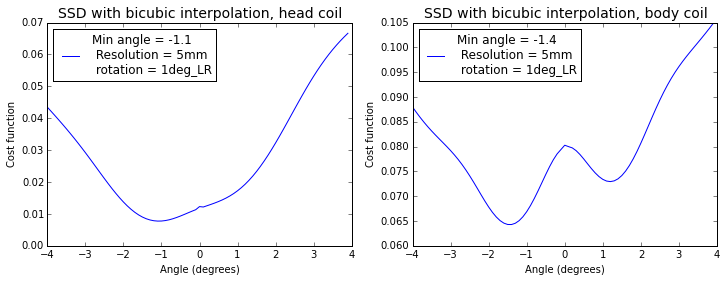

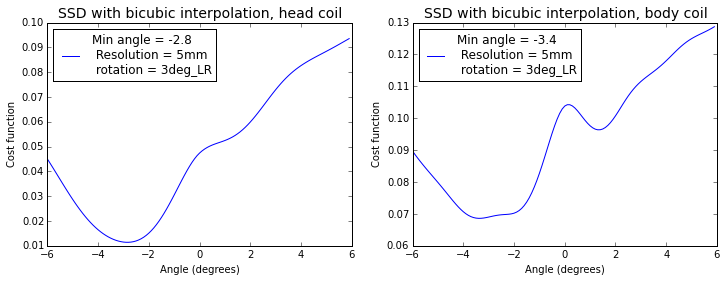

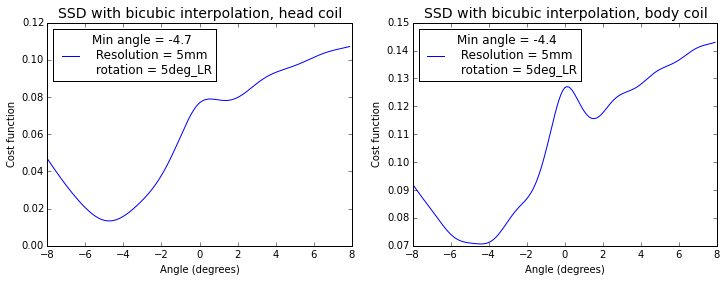

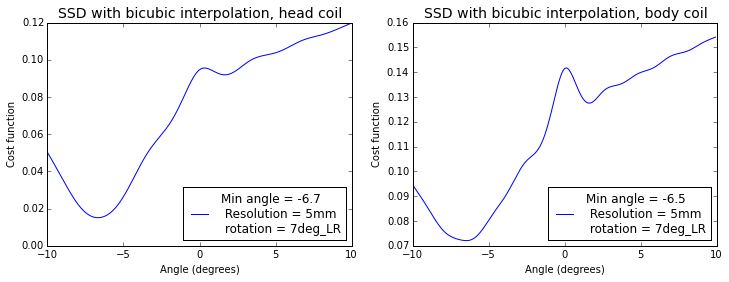

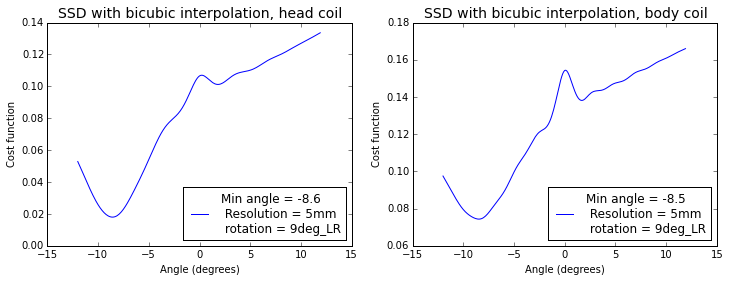

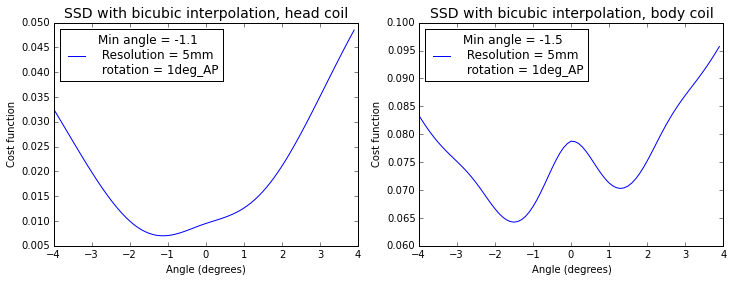

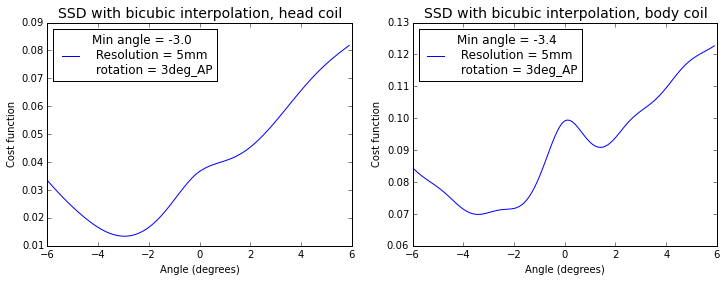

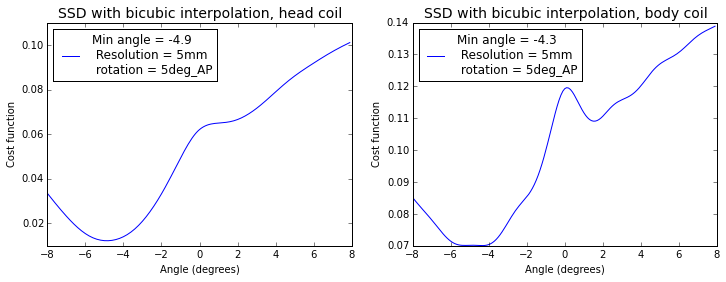

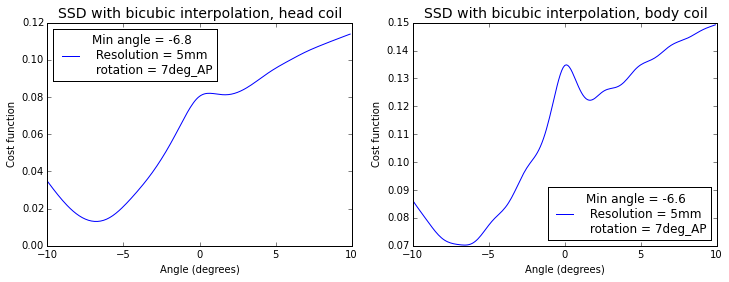

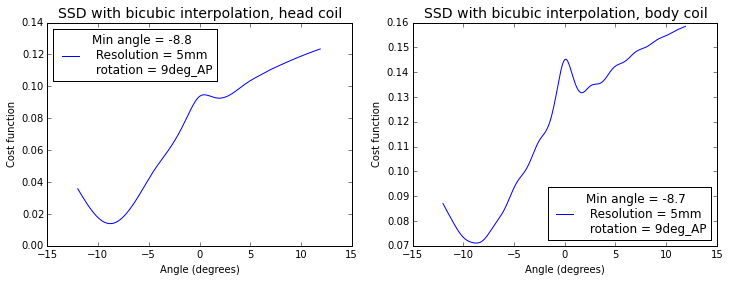

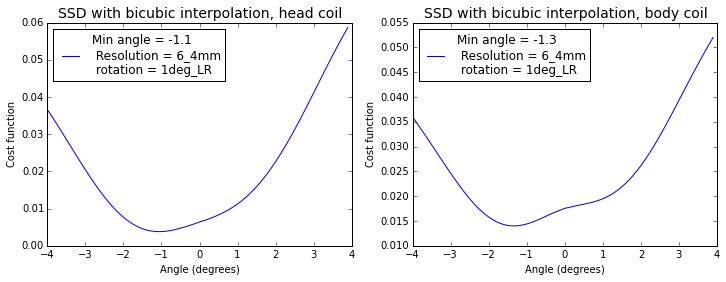

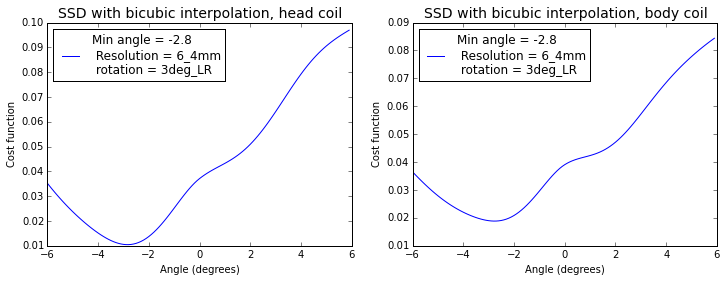

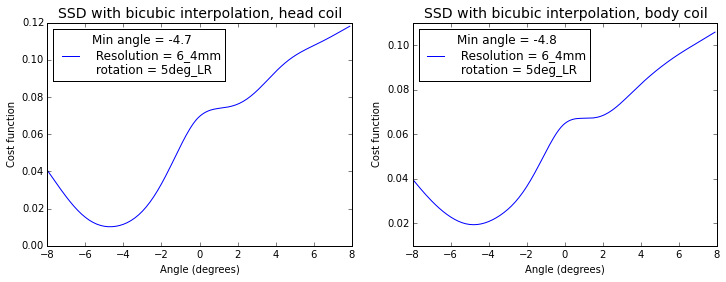

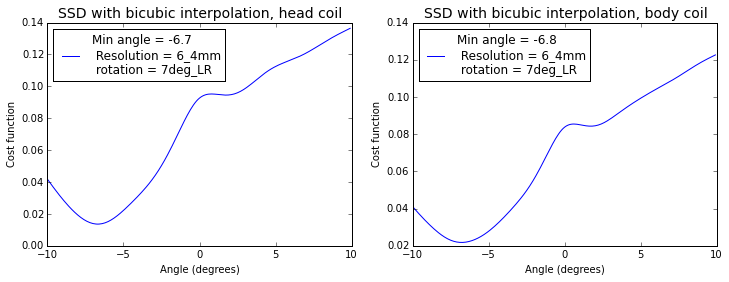

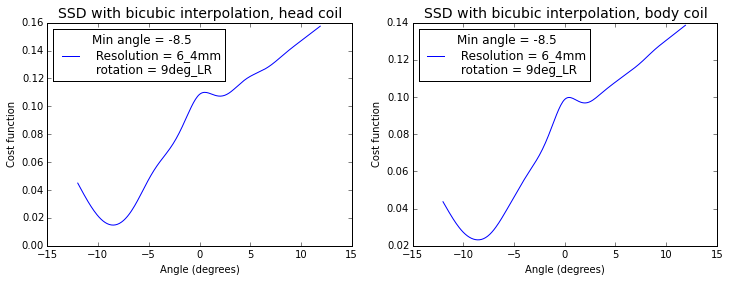

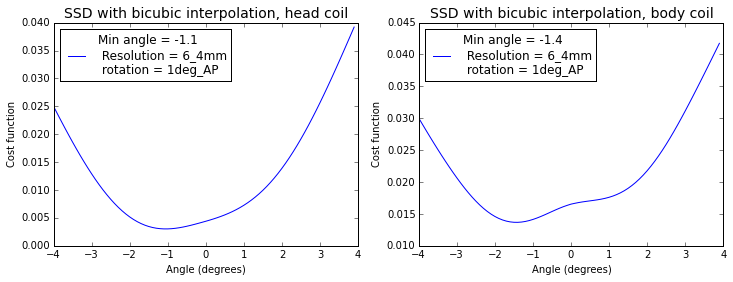

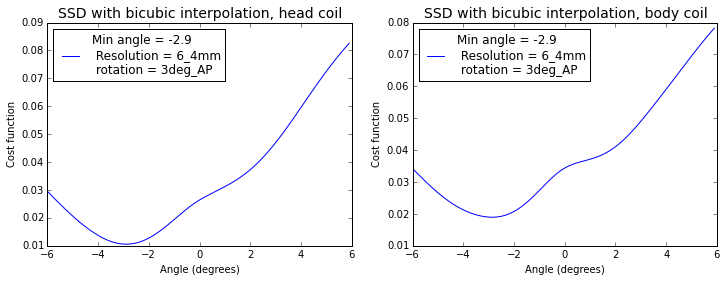

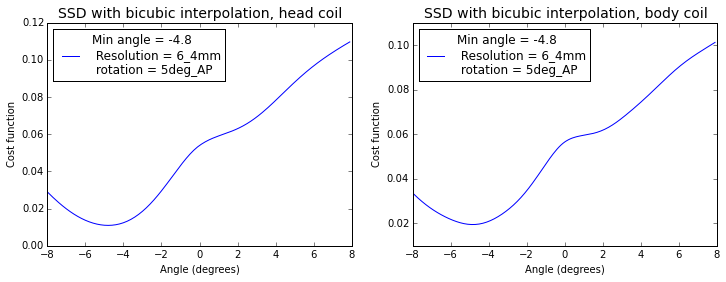

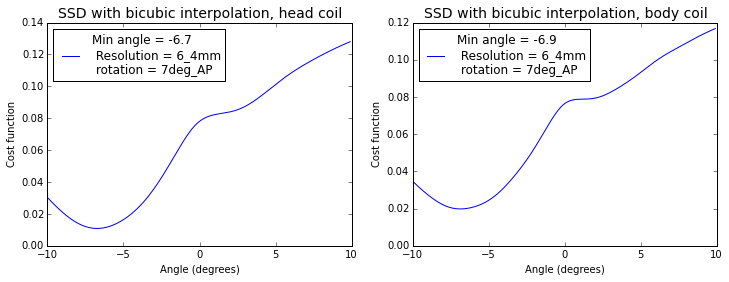

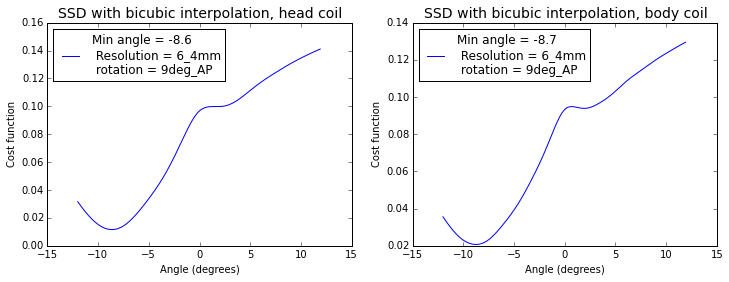

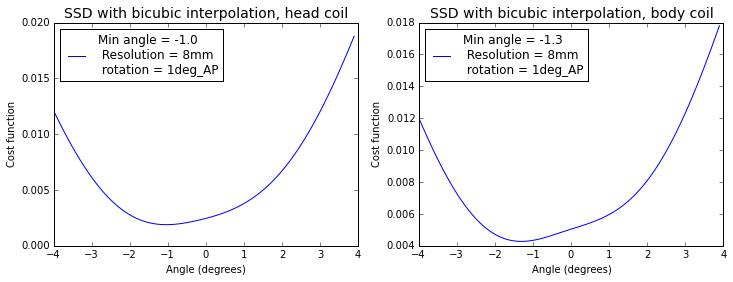

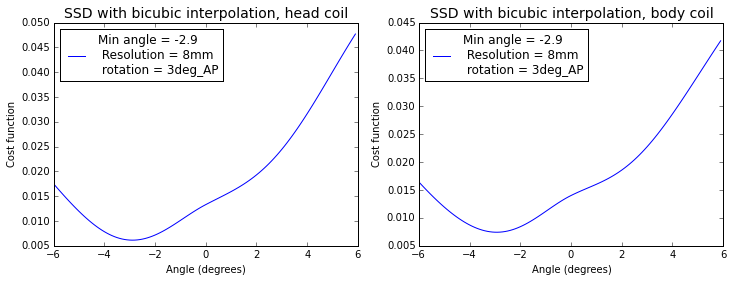

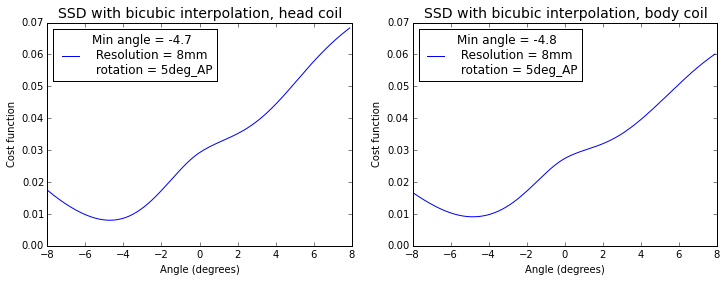

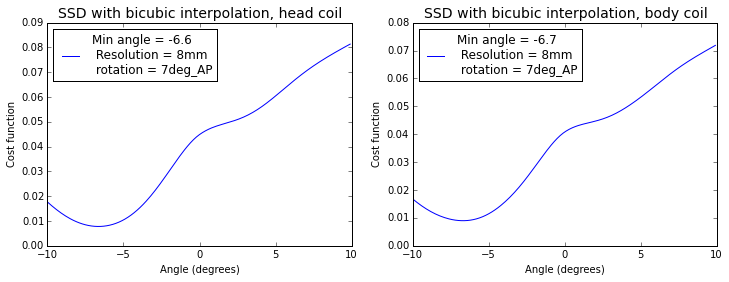

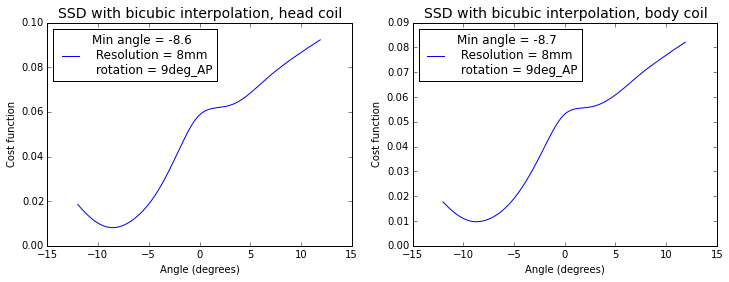

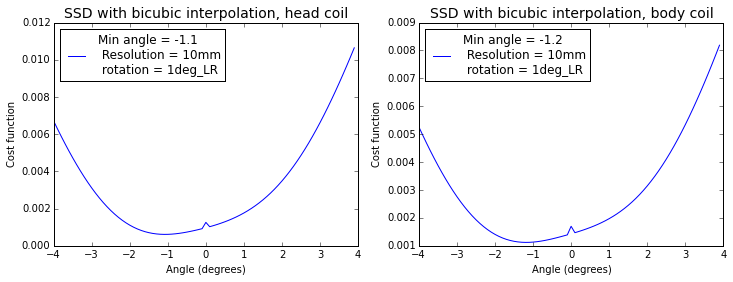

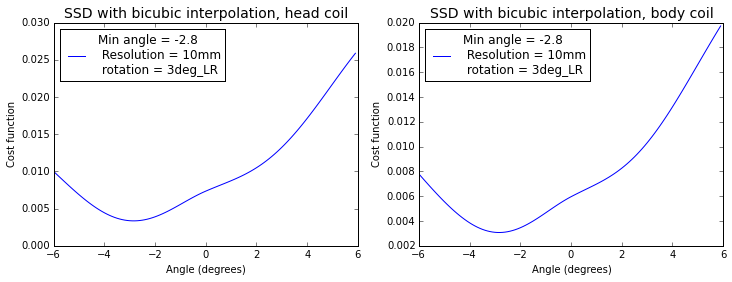

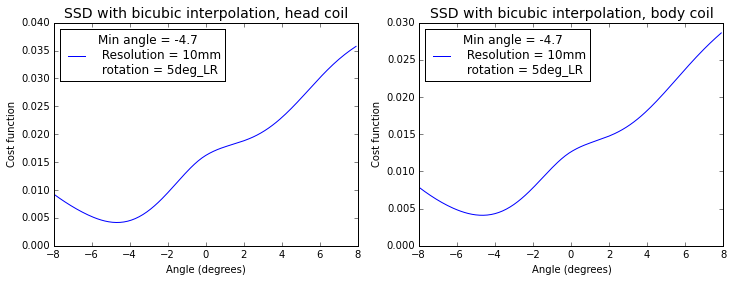

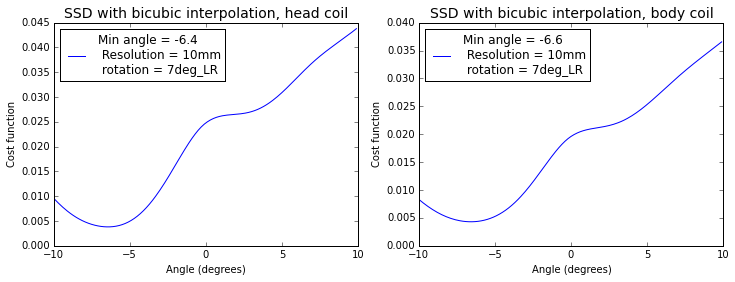

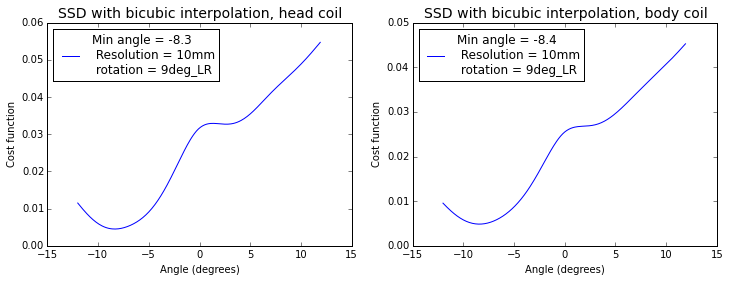

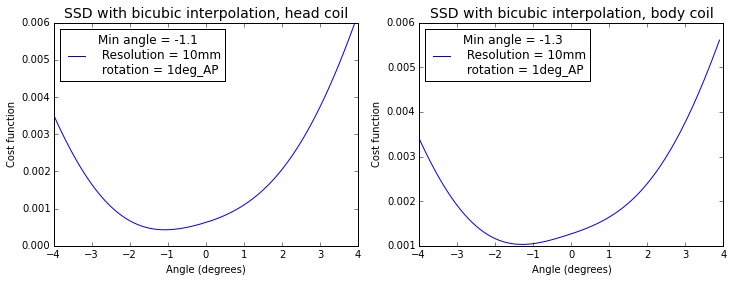

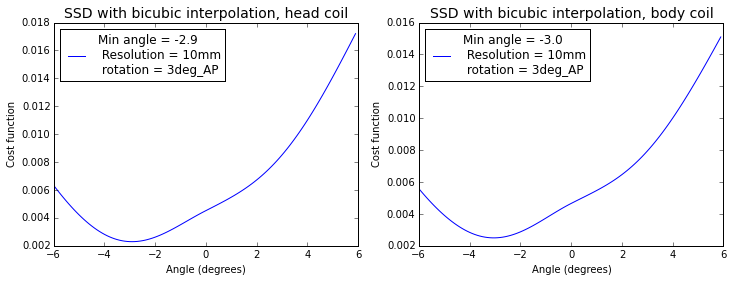

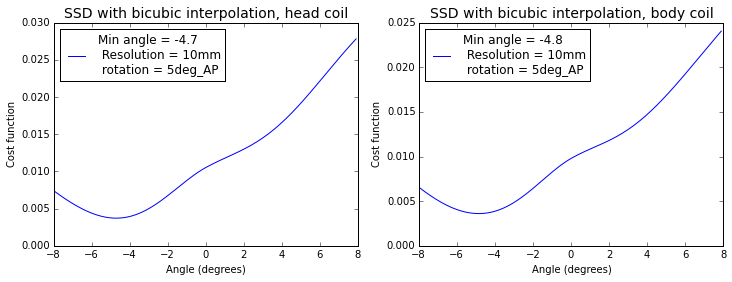

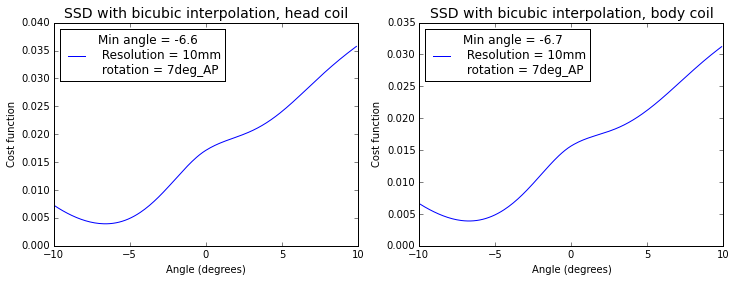

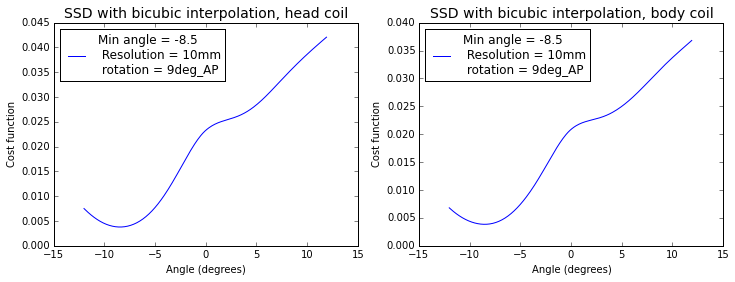

In [5]:
# repetition 0 no mask
rot_axes = ['LR','AP']
degrees = ['1deg','3deg','5deg','7deg','9deg']
resolutions = ['5mm','6_4mm','8mm','10mm']
for res in resolutions:
    for rot in rot_axes:
        if((res == '8mm') & (rot == 'LR')):
           continue
        if(rot == 'LR'): ax = 0
        if(rot == 'AP'): ax = 1
        for deg in degrees:
            plt.figure(figsize=[12,4])
            for idx, coil in enumerate(['head', 'body']):
                d = int(deg[0])
                thetas = np.arange(-d-3,d+3,0.1)
                cost = rot_cost_func(data_dict[res][coil]['iso'][0],data_dict[res][coil][rot][deg][0],
                                     thetas,axis=ax,interpolation='bicubic')
                plt.subplot(1,2,idx+1)
                plot_cost_func(thetas, cost, res, 'bicubic',deg+'_'+rot, coil)
            plt.show()

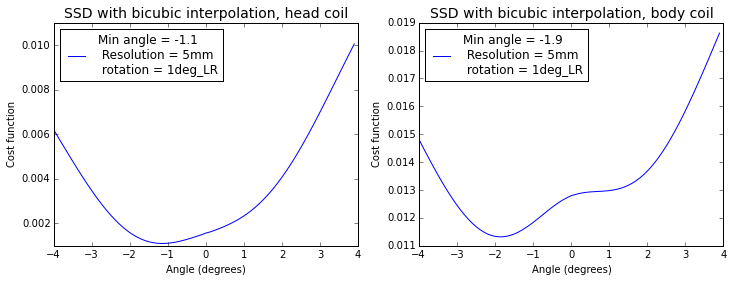

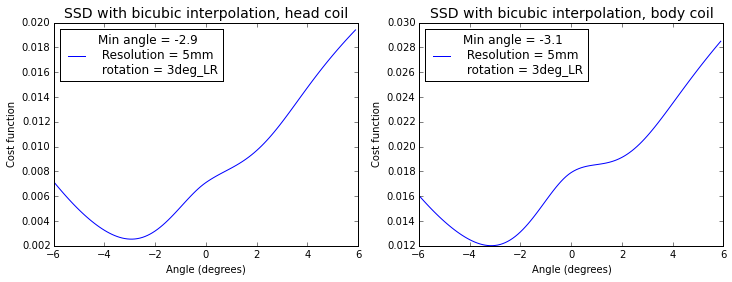

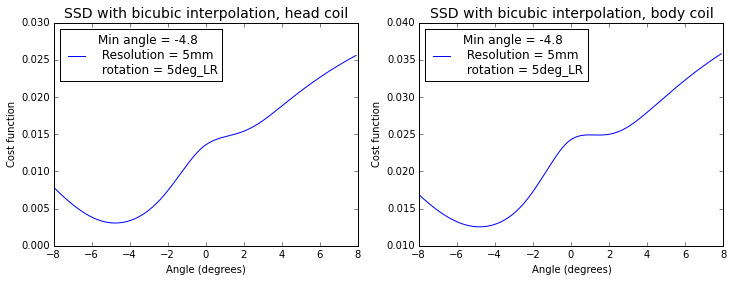

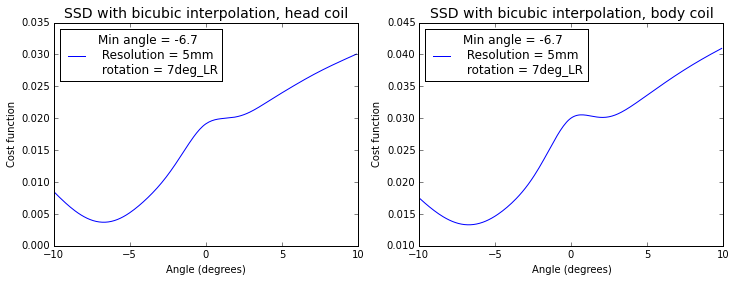

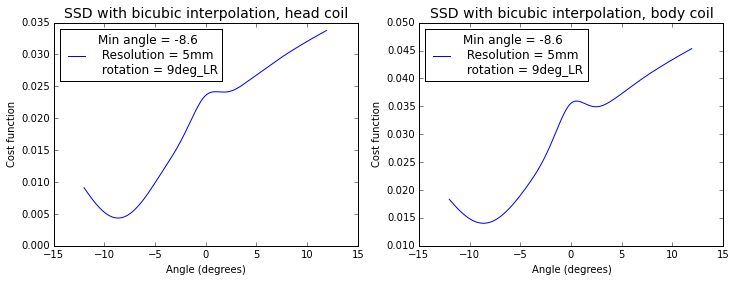

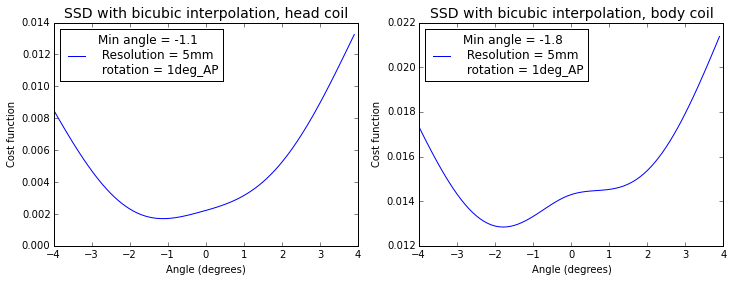

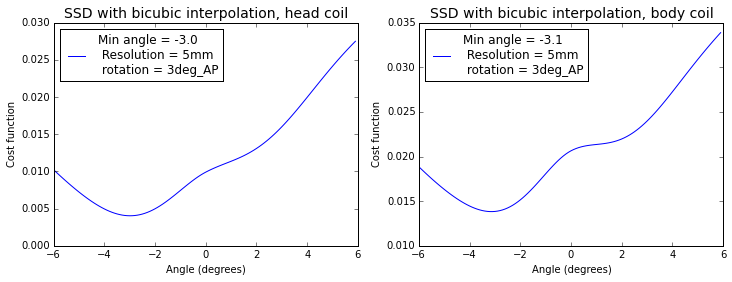

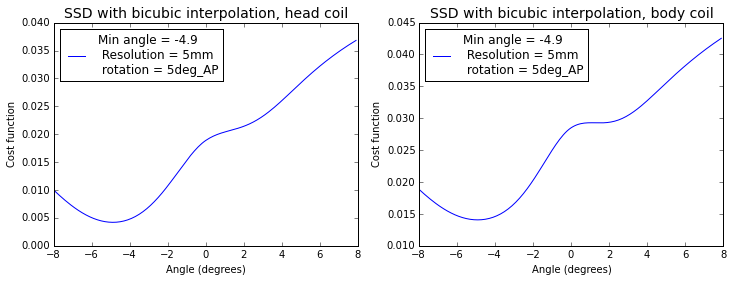

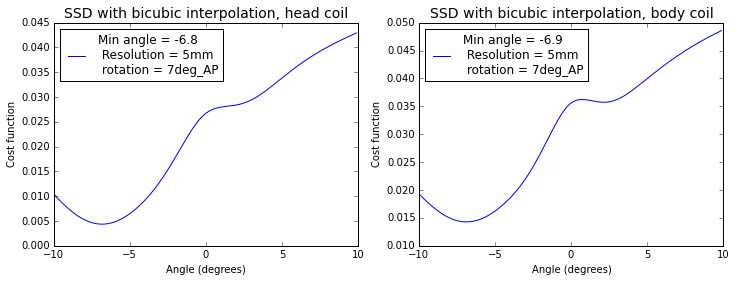

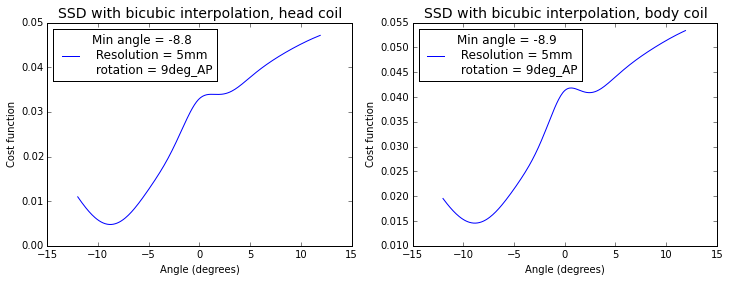

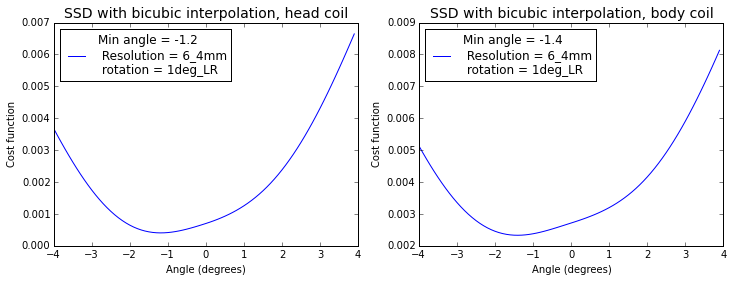

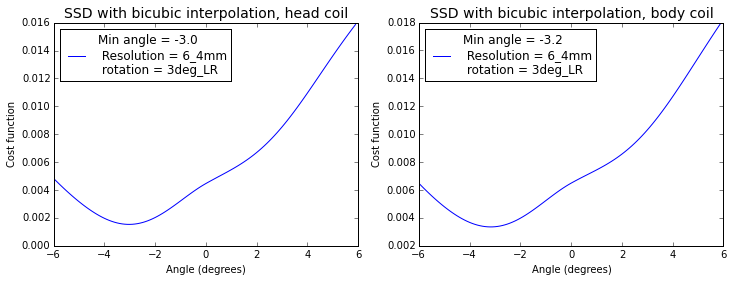

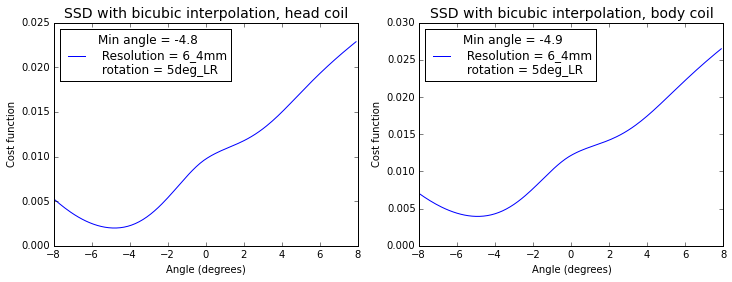

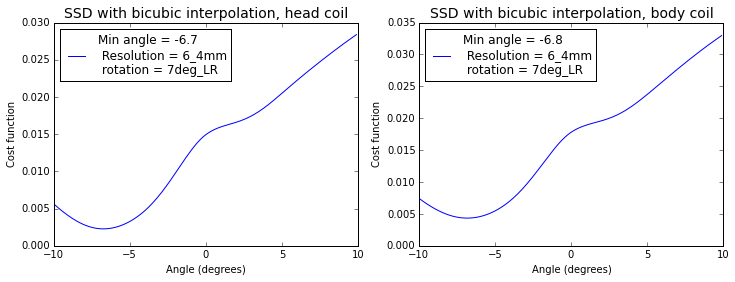

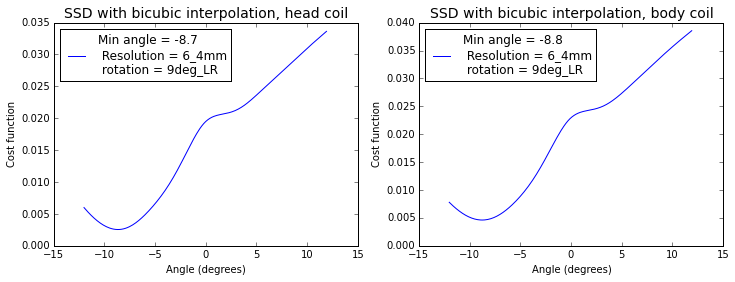

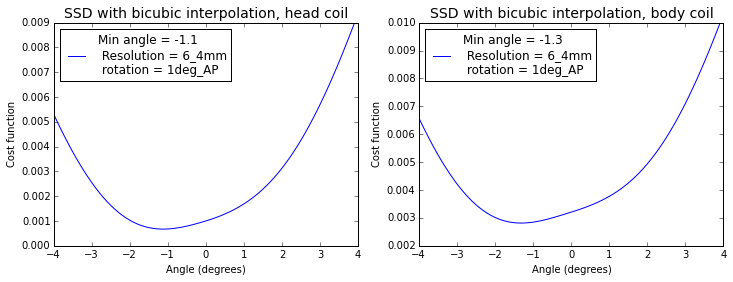

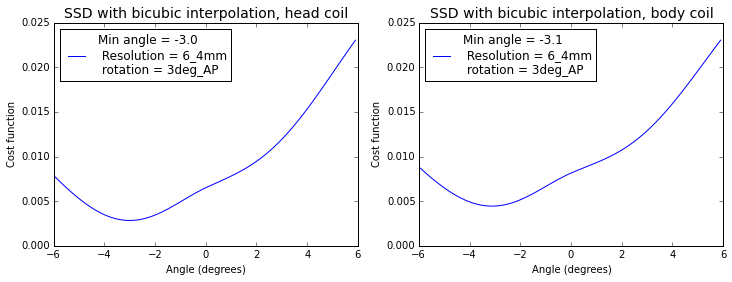

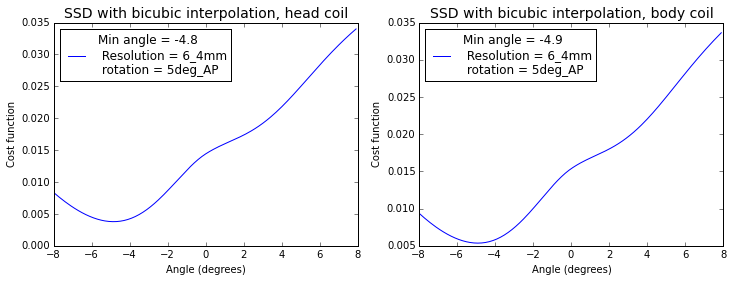

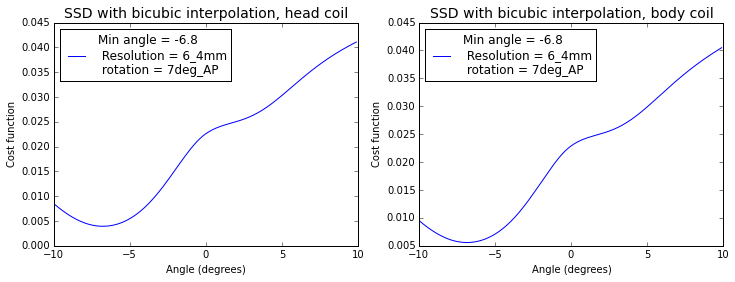

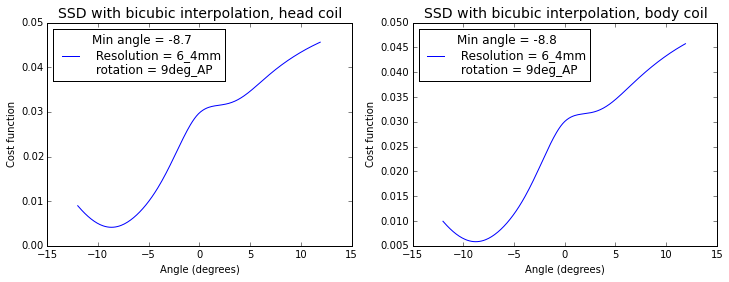

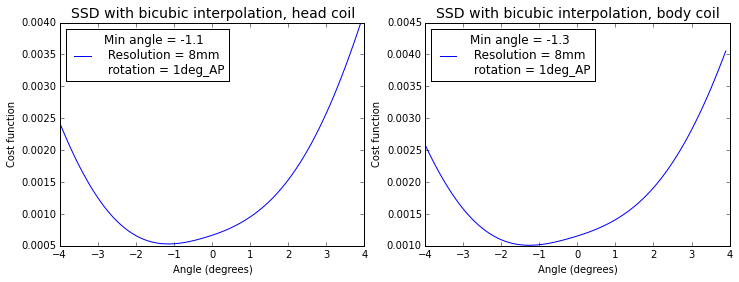

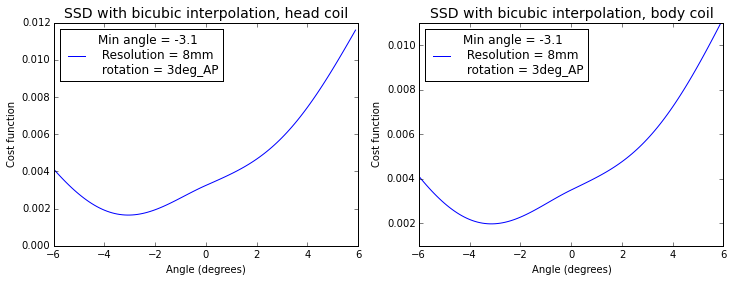

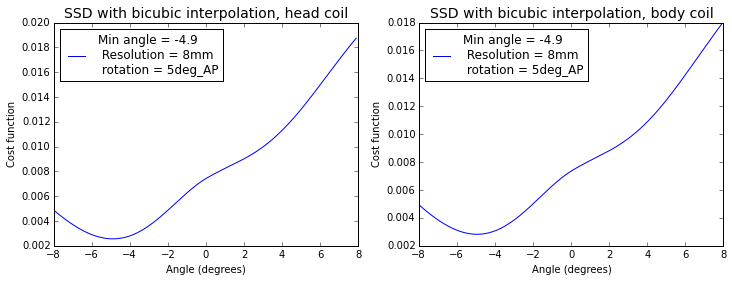

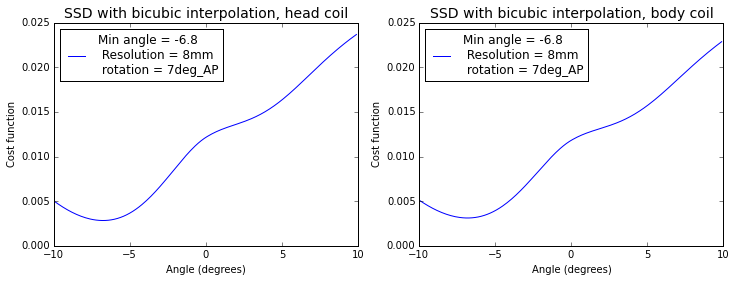

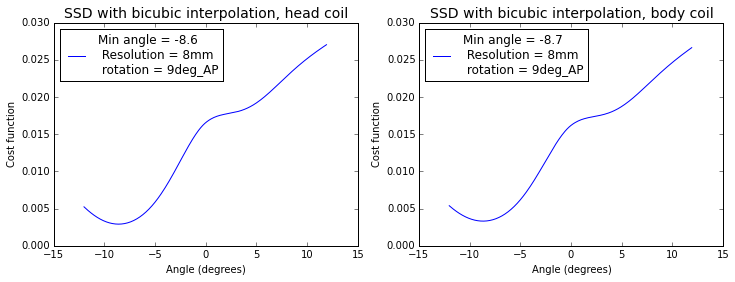

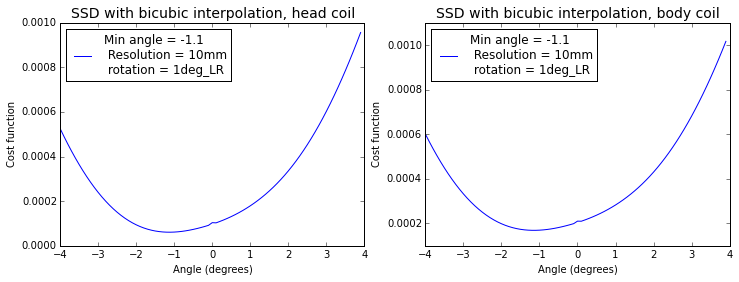

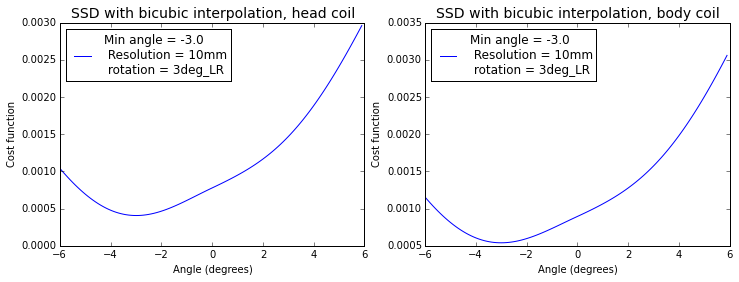

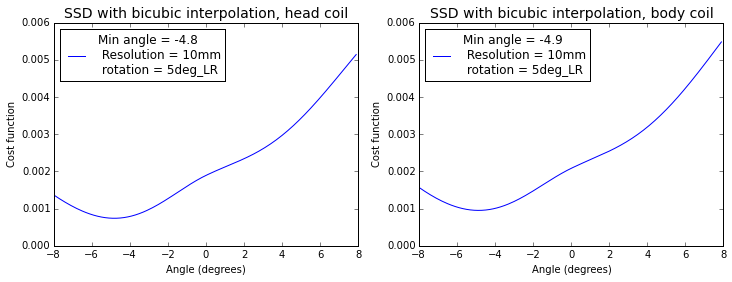

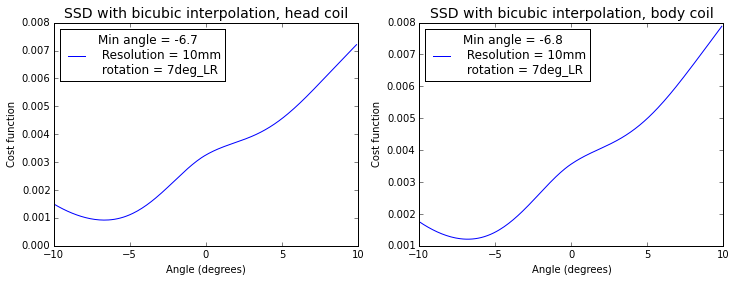

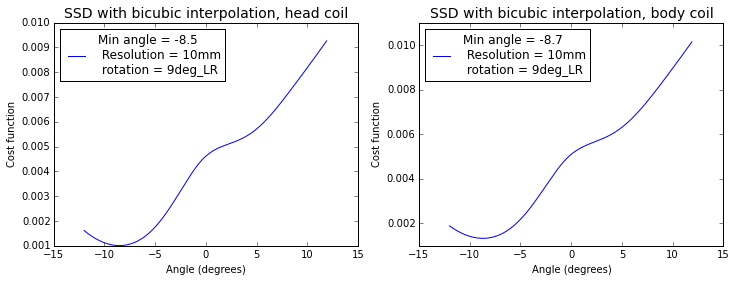

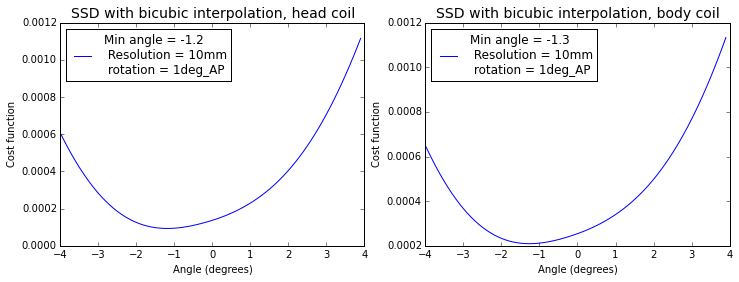

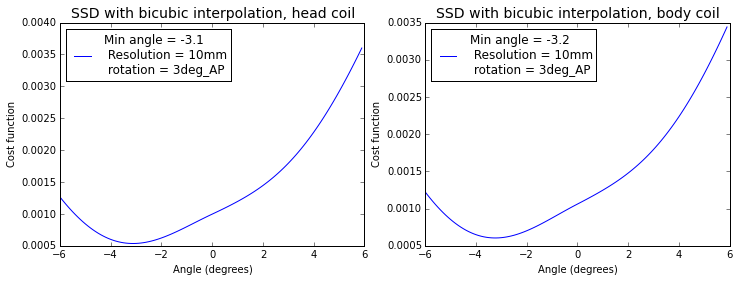

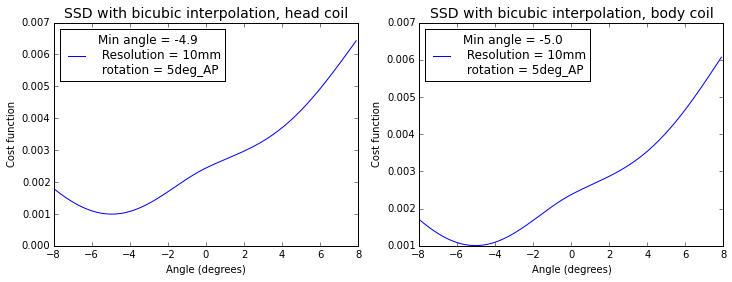

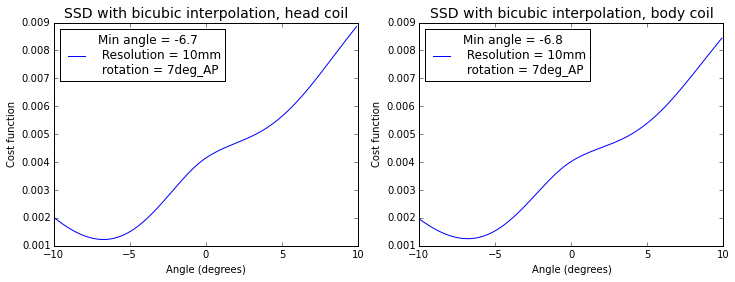

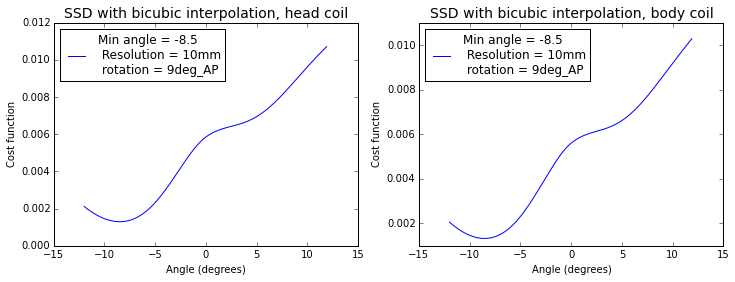

In [6]:
# repetition 0 with mask
rot_axes = ['LR','AP']
degrees = ['1deg','3deg','5deg','7deg','9deg']
resolutions = ['5mm','6_4mm','8mm','10mm']
for res in resolutions:
    for rot in rot_axes:
        if((res == '8mm') & (rot == 'LR')):
           continue
        if(rot == 'LR'): ax = 0
        if(rot == 'AP'): ax = 1
        for deg in degrees:
            plt.figure(figsize=[12,4])
            for idx, coil in enumerate(['head', 'body']):
                d = int(deg[0])
                thetas = np.arange(-d-3,-d+3,0.1)
                cost = rot_cost_func(data_dict[res][coil]['iso'][0],data_dict[res][coil][rot][deg][0],thetas,axis=ax,interpolation='bicubic',mask=True,smooth=True)
                plt.subplot(1,2,idx+1)
                plot_cost_func(thetas, cost, res, 'bicubic',deg+'_'+rot, coil)
            plt.show()

In [6]:
from rotation_2d import rot_halton_cost_func

14 14

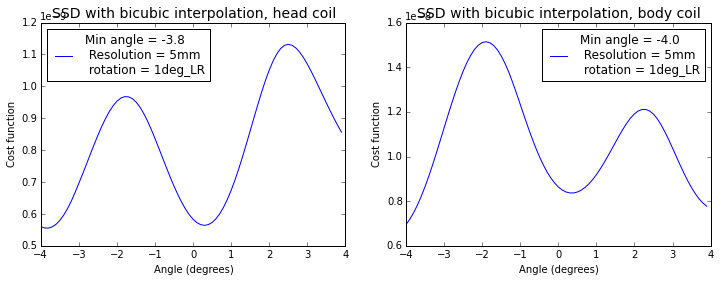

 14 14

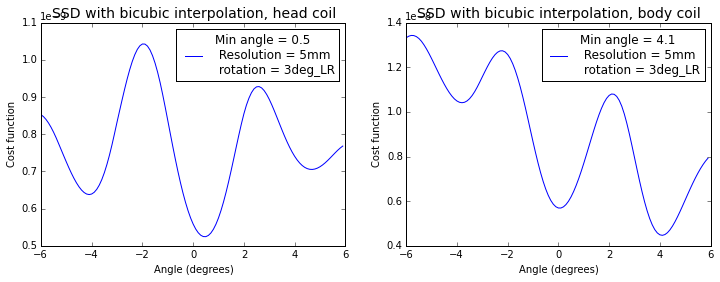

 14 14

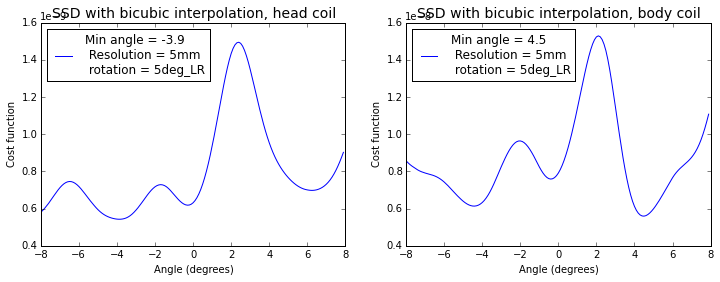

 14 14

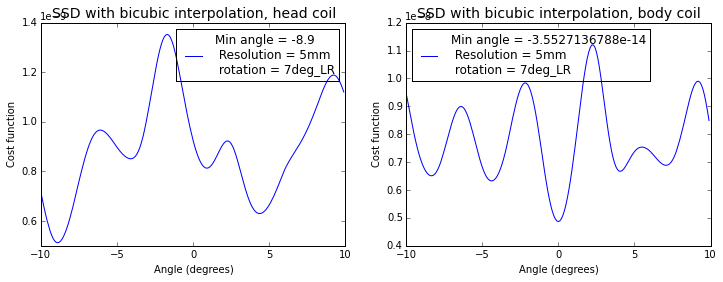

 14 14

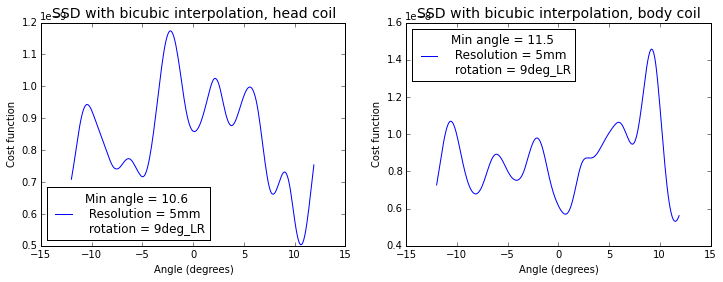

 14 14

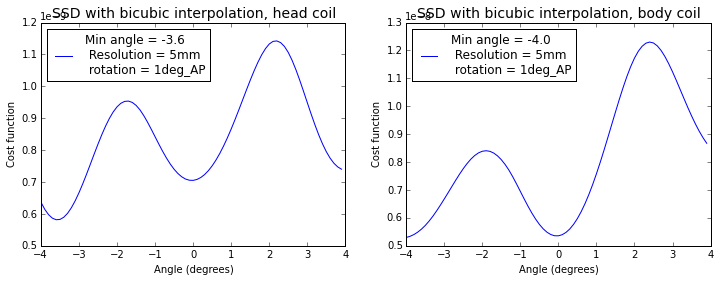

 14 14

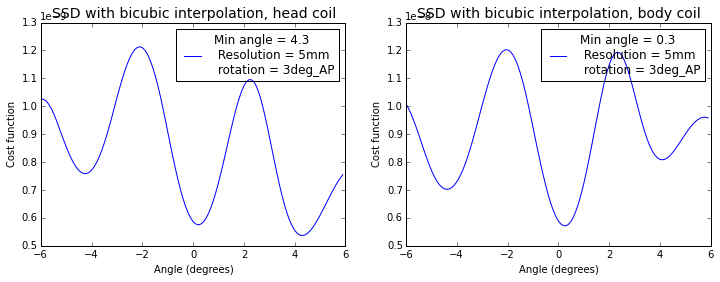

 14 14

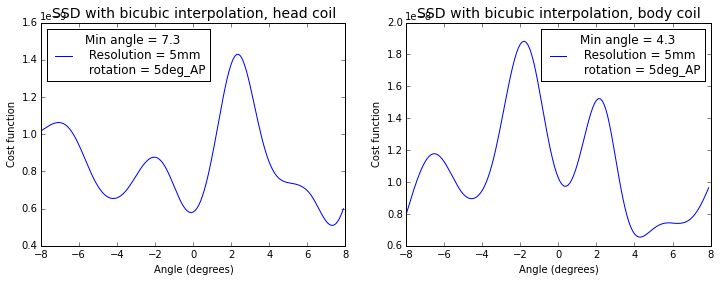

 14 14

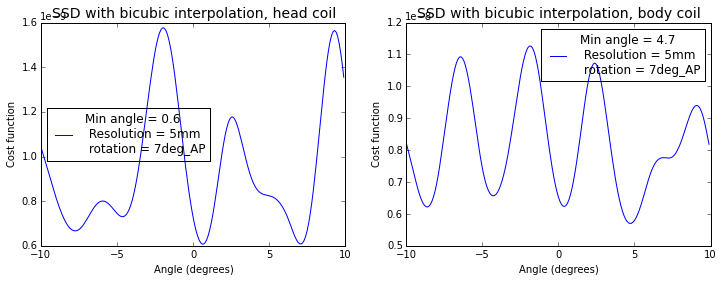

 14 14

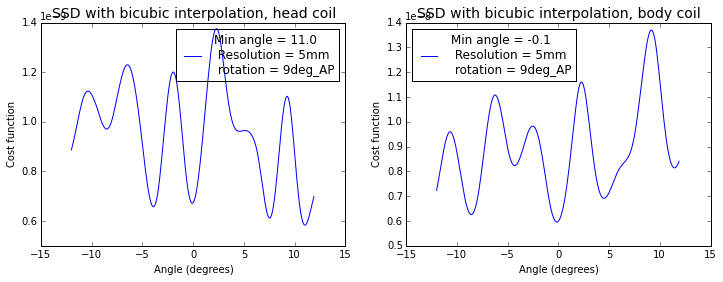

 14 14

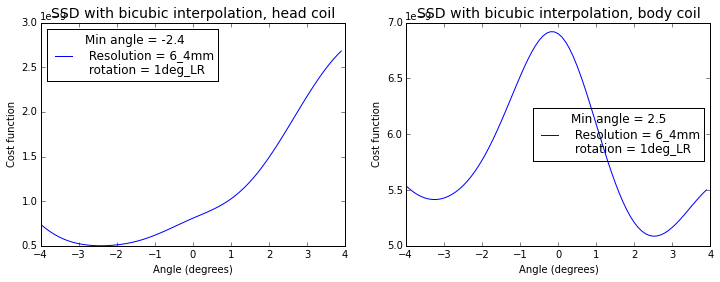

 14 14

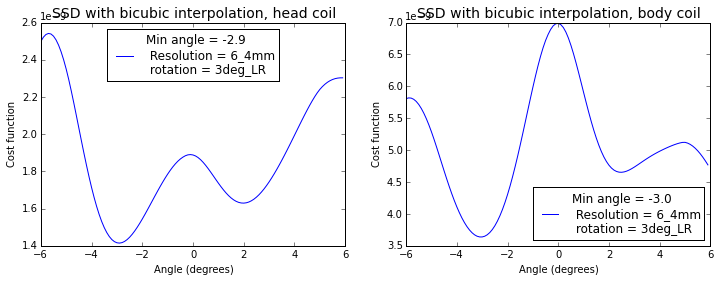

 14 14

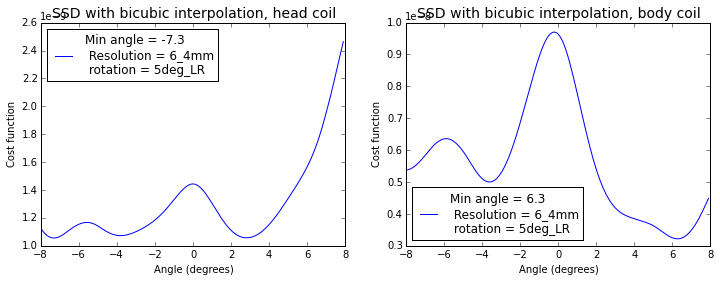

 14 14

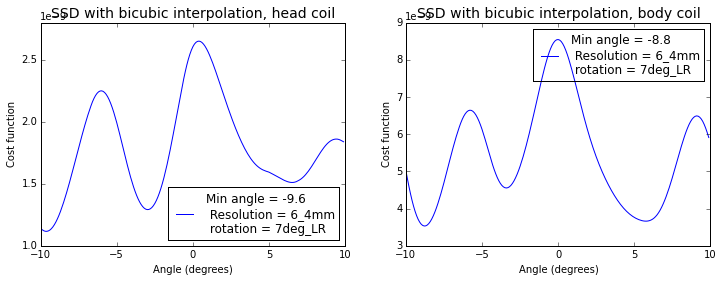

 14 14

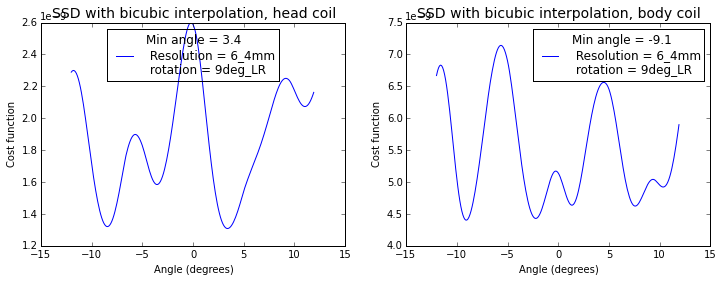

 14 14

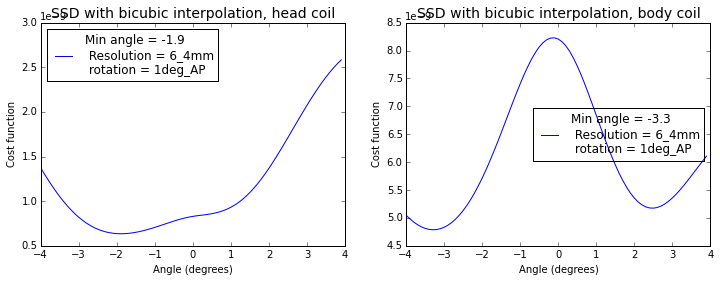

 14 14

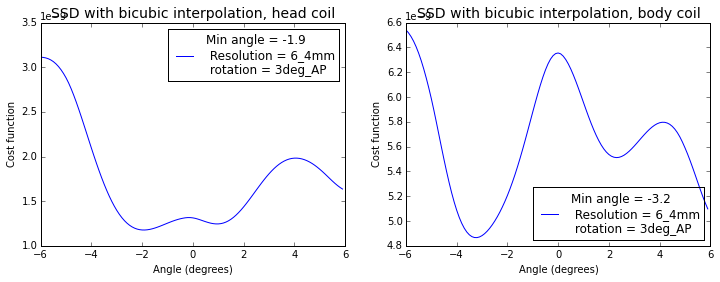

 14 14

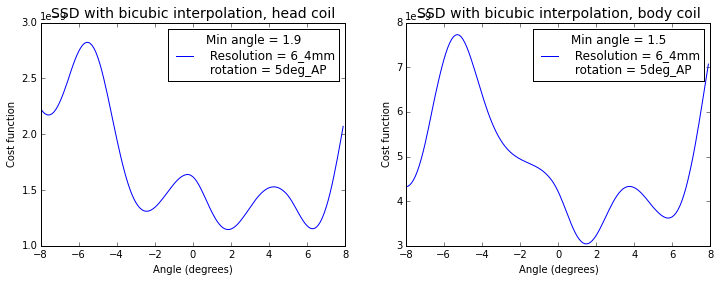

 14 14

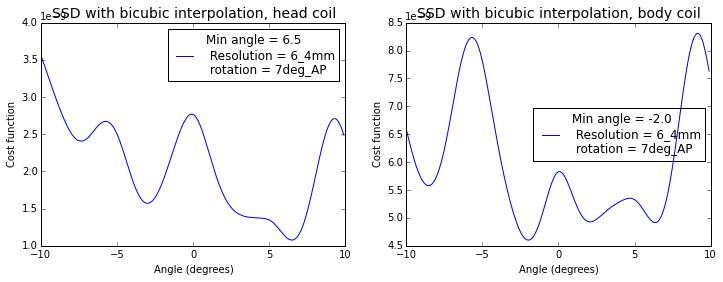

 14 14

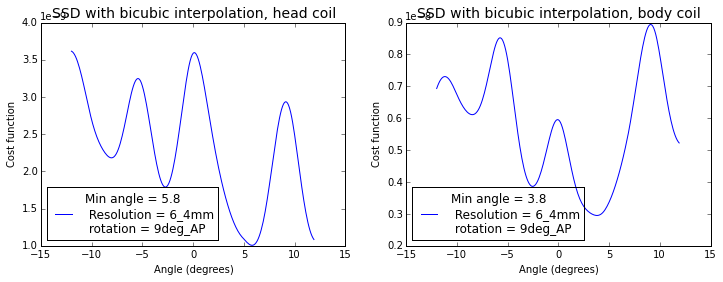

 14 14

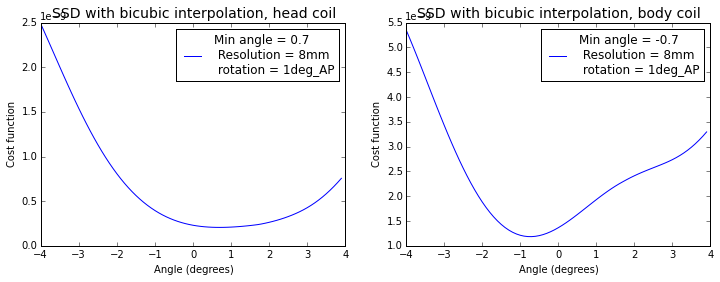

 14 14

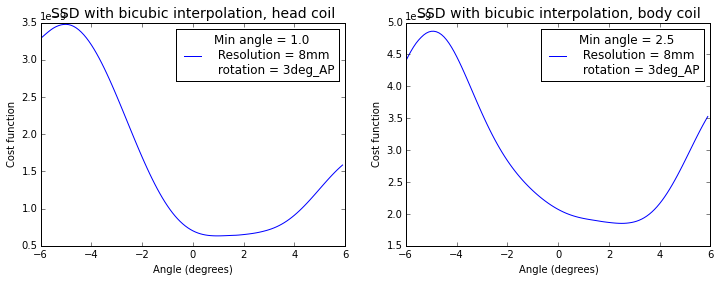

 14 14

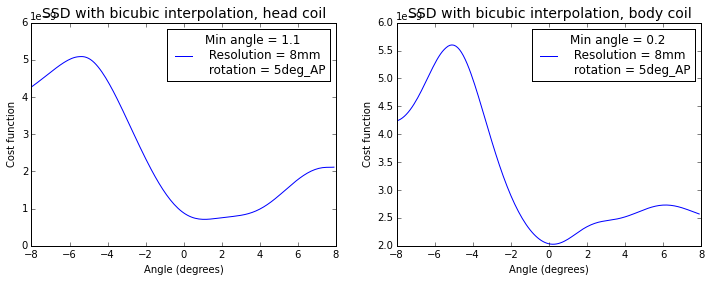

 14 14

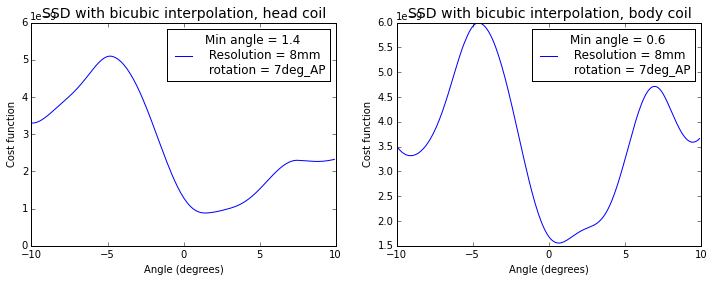

 14 14

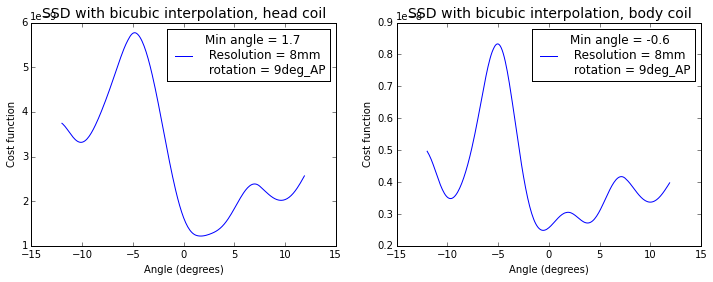

 14 14

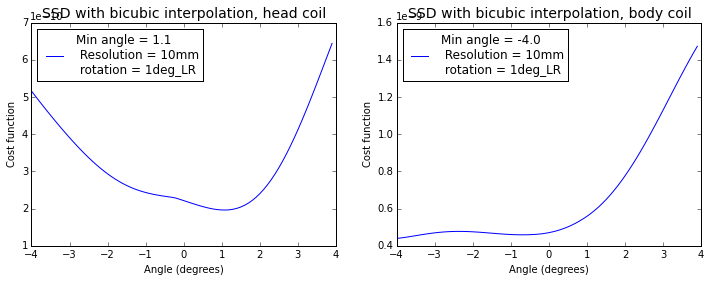

 14 14

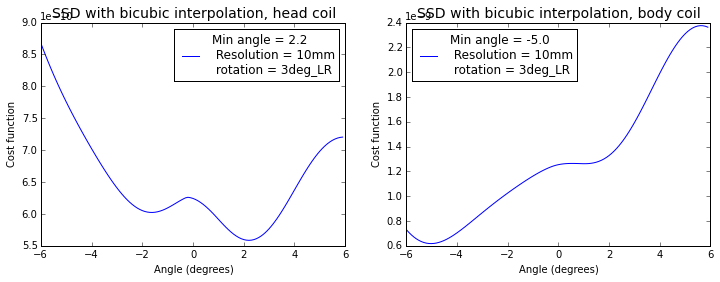

 14 14

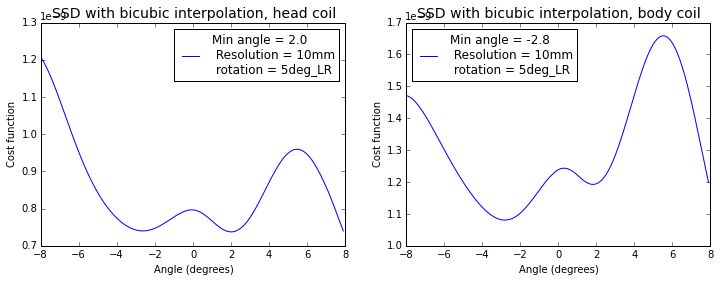

 14 14

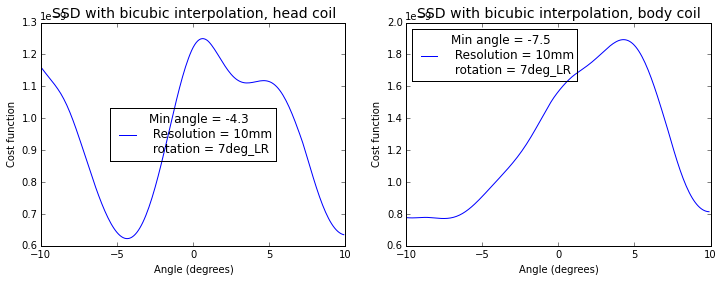

 14 14

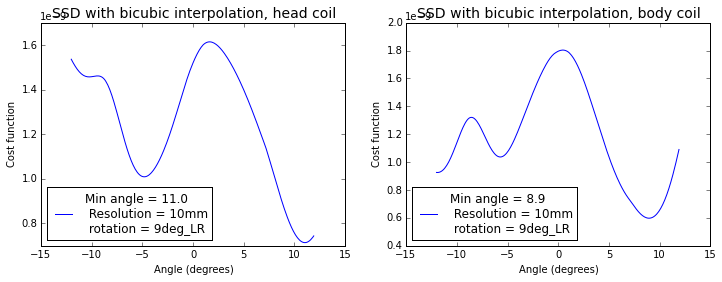

 14 14

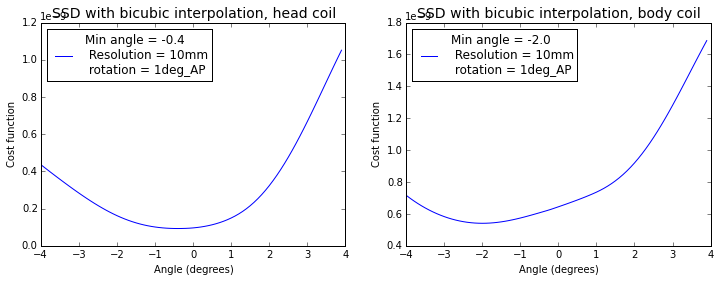

 14 14

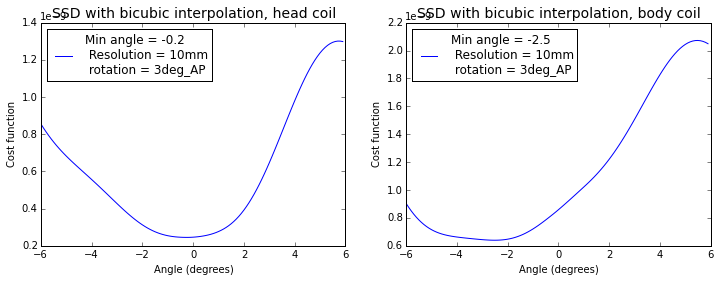

 14 14

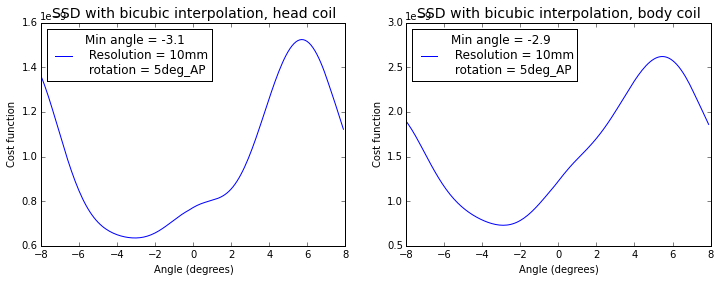

 14 14

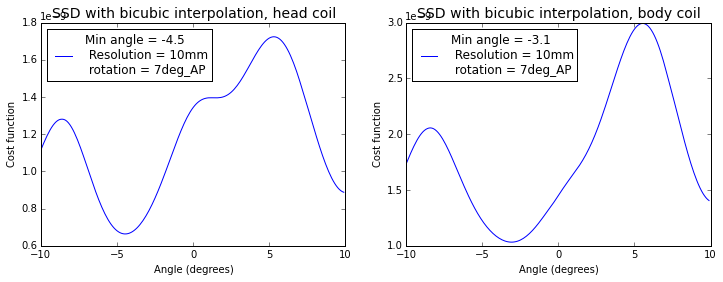

 14 14

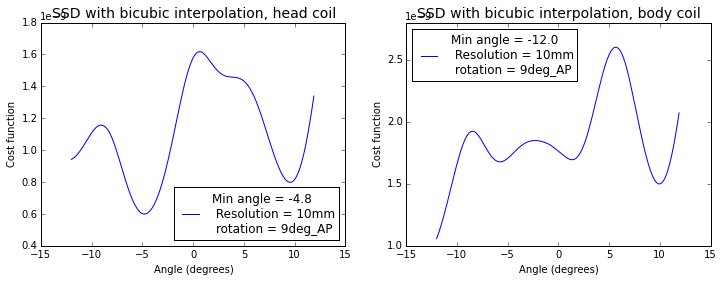

In [9]:
# 20 Halton Samples 
N = 30
rot_axes = ['LR','AP']
degrees = ['1deg','3deg','5deg','7deg','9deg']
resolutions = ['5mm','6_4mm','8mm','10mm']
for res in resolutions:
    for rot in rot_axes:
        if((res == '8mm') & (rot == 'LR')):
           continue
        if(rot == 'LR'): ax = 0
        if(rot == 'AP'): ax = 1
        for deg in degrees:
            plt.figure(figsize=[12,4])
            for idx, coil in enumerate(['head', 'body']):
                d = int(deg[0])
                thetas = np.arange(-d-3,d+3,0.1)
                halton_cost = rot_halton_cost_func(data_dict[res][coil]['iso'][0],
                                           data_dict[res][coil][rot][deg][0], 
                                           N, thetas, axis=0, interpolation='bicubic')
                plt.subplot(1,2,idx+1)
                plot_cost_func(thetas, halton_cost, res, 'bicubic',deg+'_'+rot, coil)
            plt.show()

22 22

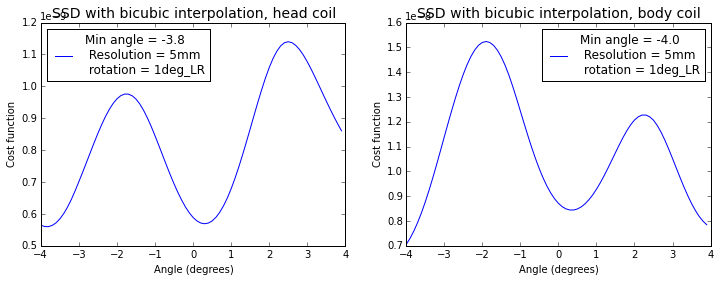

 22 22

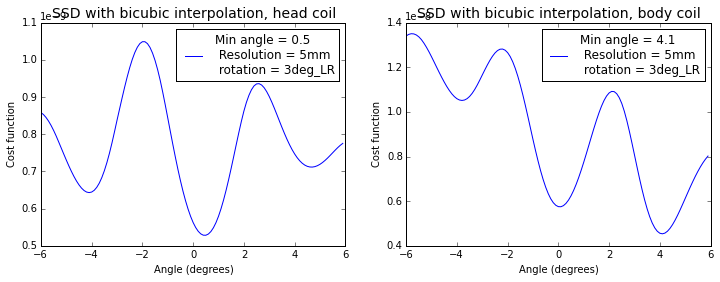

 22 22

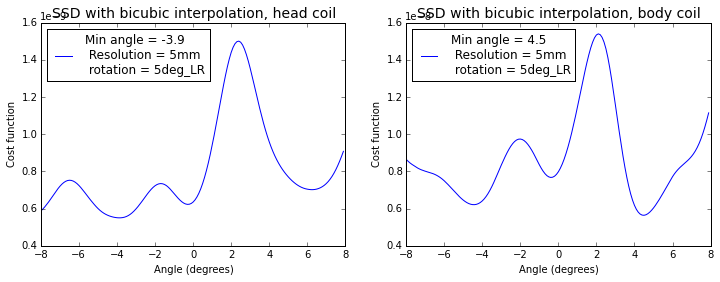

 22 22

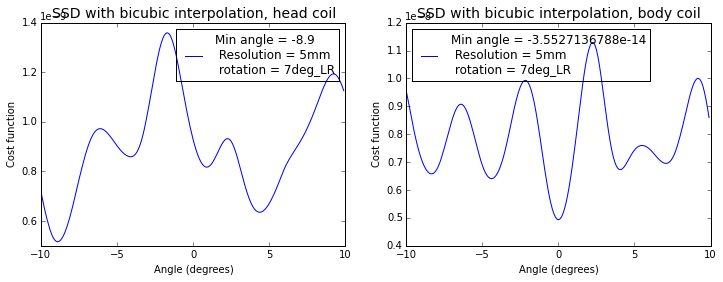

 22 22

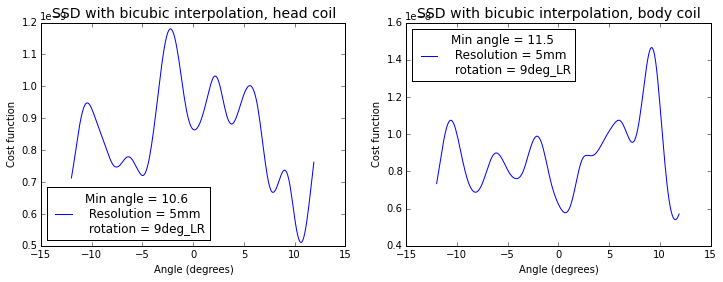

 22 22

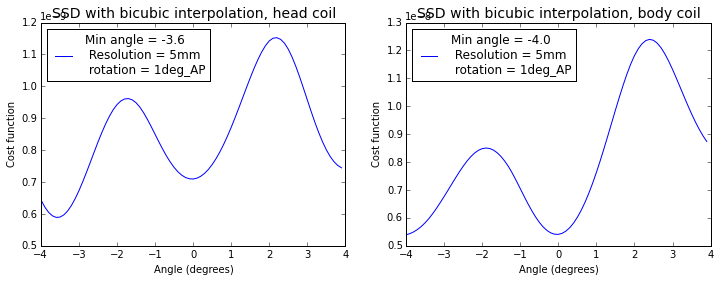

 22 22

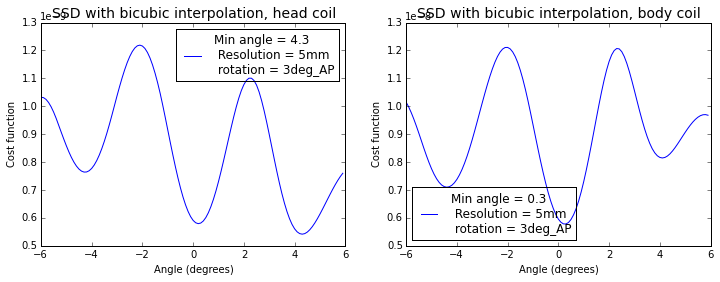

 22 22

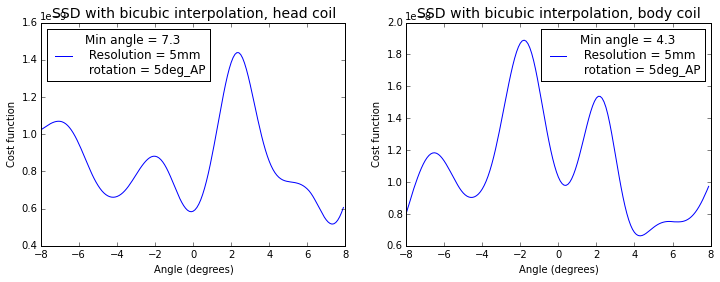

 22 22

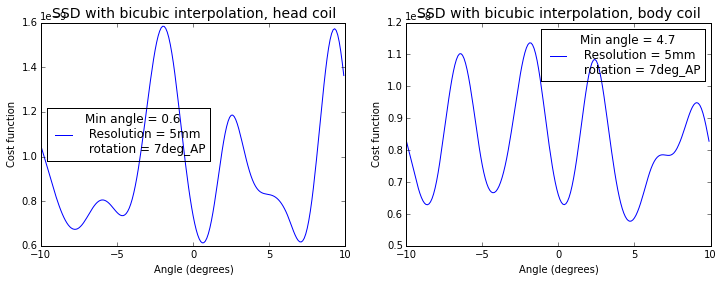

 22 22

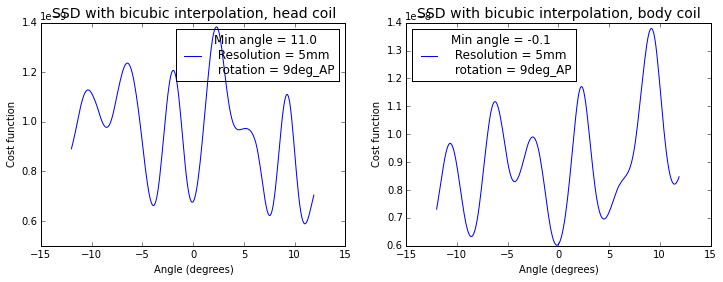

 22 22

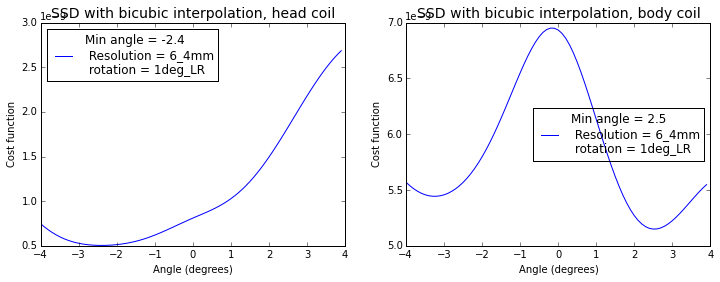

 22 22

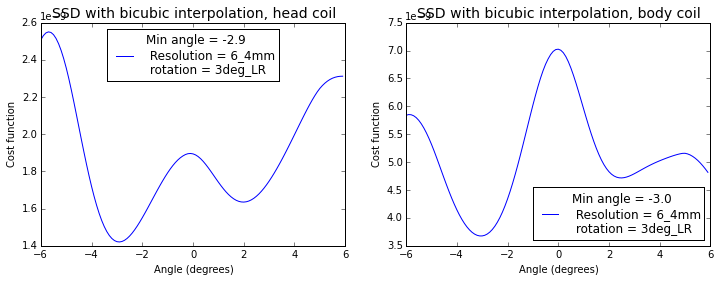

 22 22

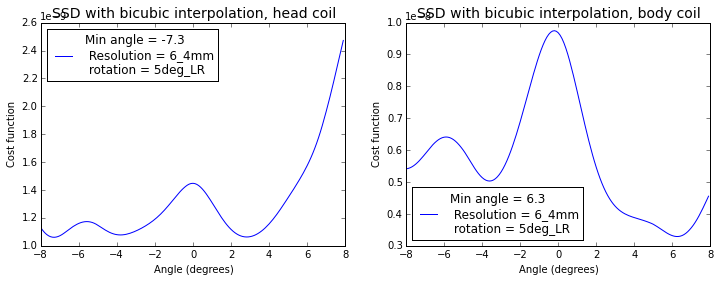

 22 22

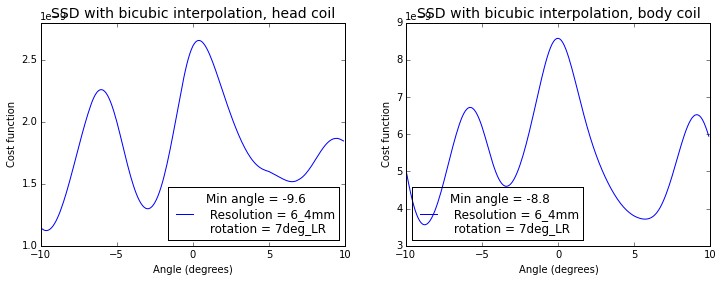

 22 22

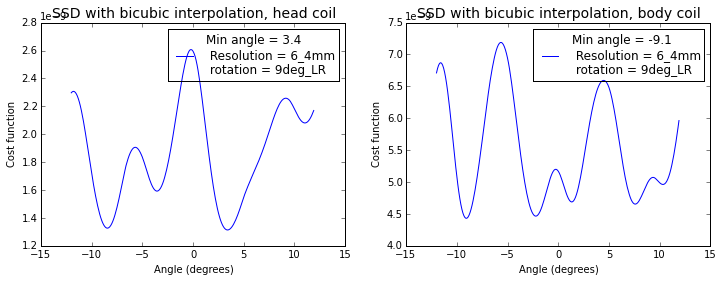

 22 22

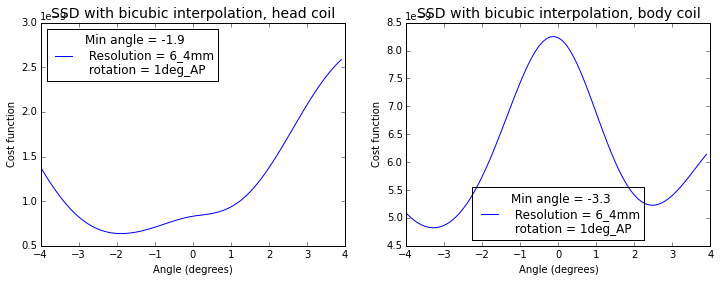

 22 22

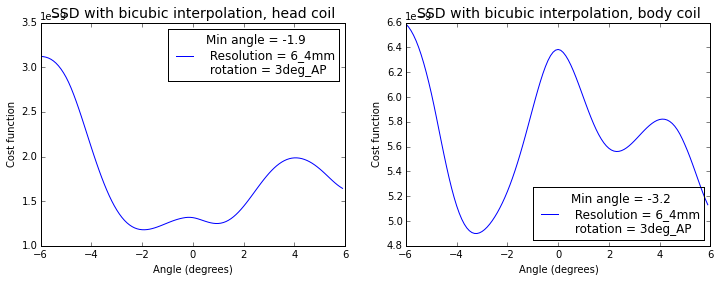

 22 22

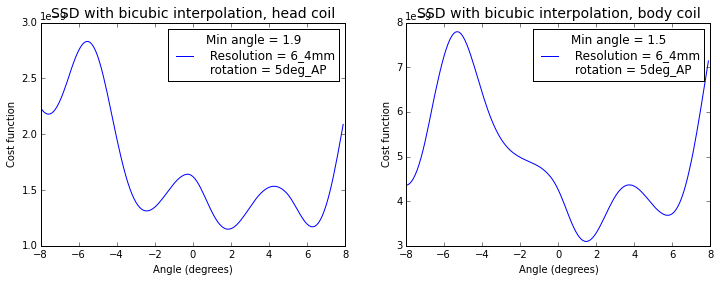

 22 22

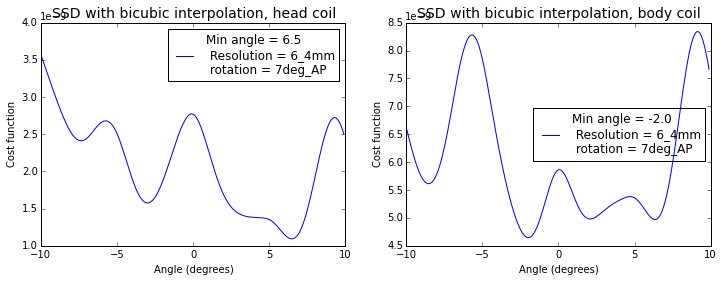

 22 22

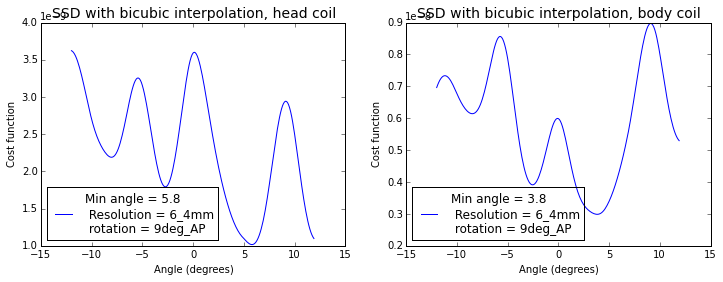

 22 22

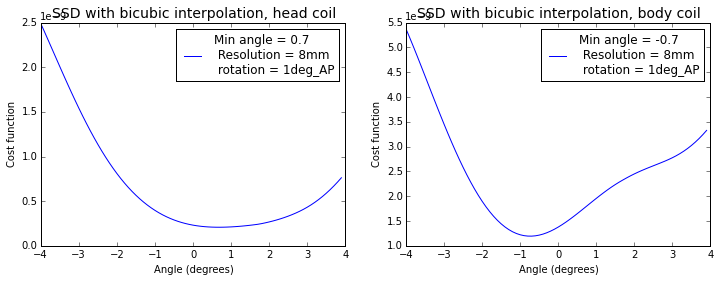

 22 22

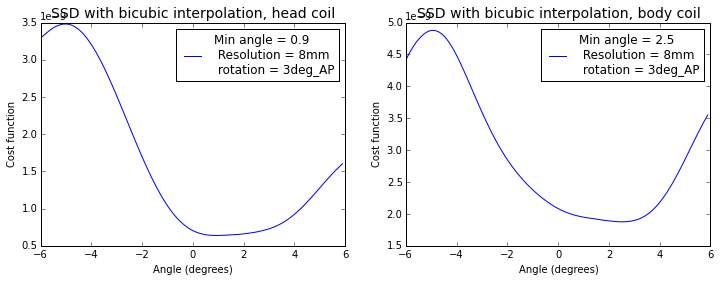

 22 22

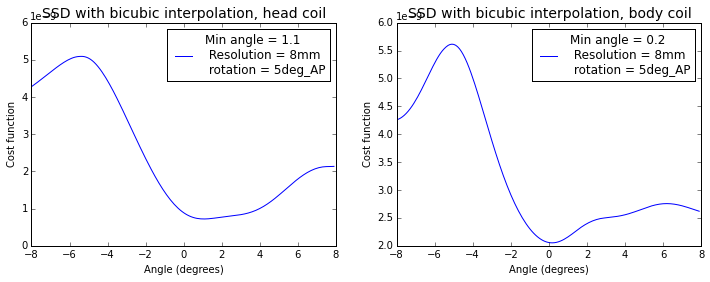

 22 22

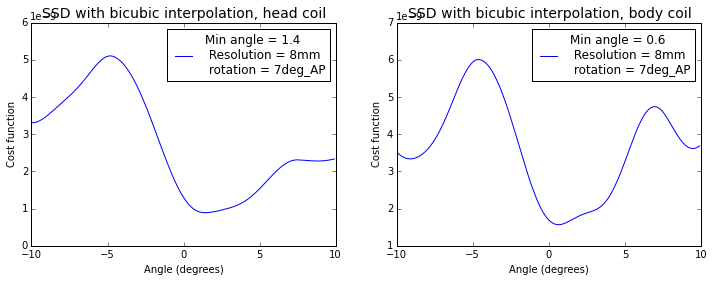

 22 22

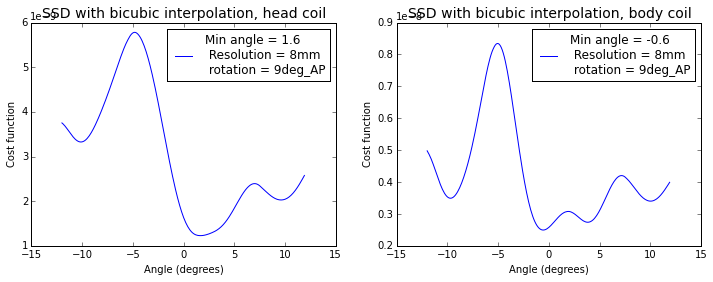

 22 22

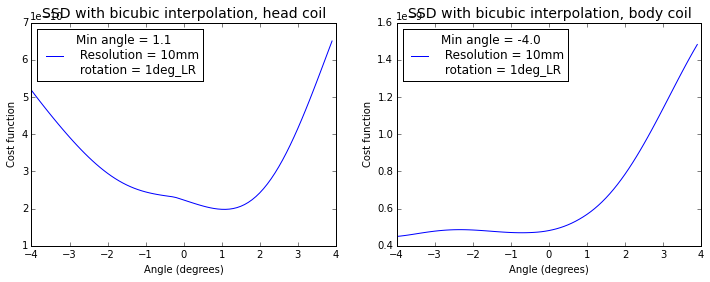

 22 22

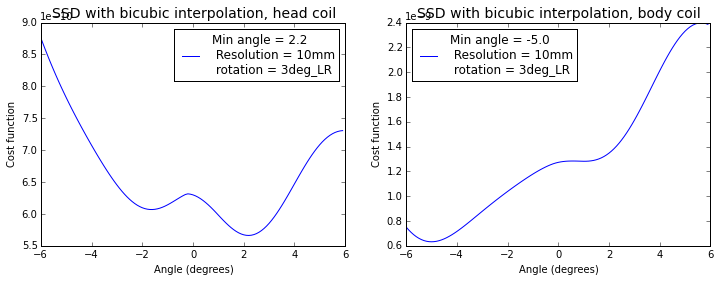

 22 22

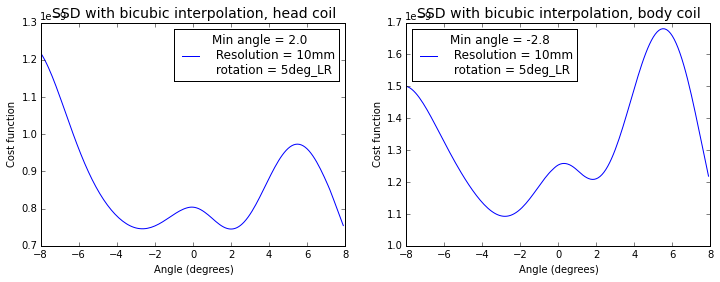

 22 22

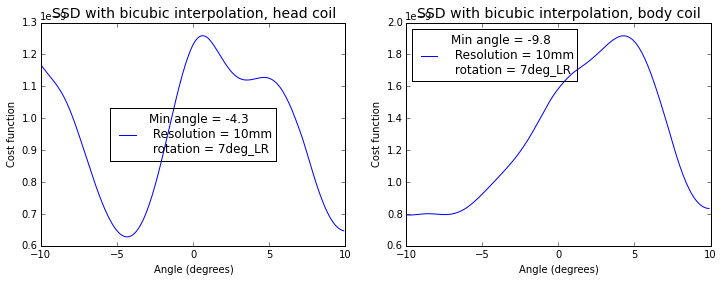

 22 22

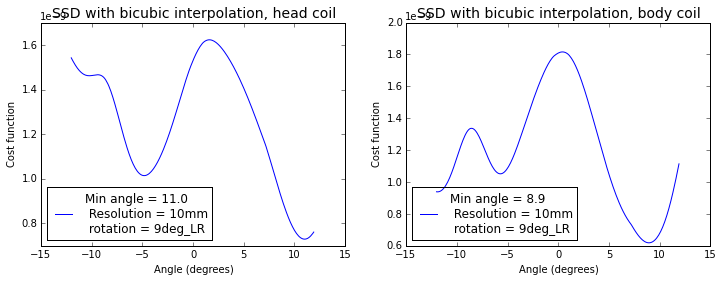

 22 22

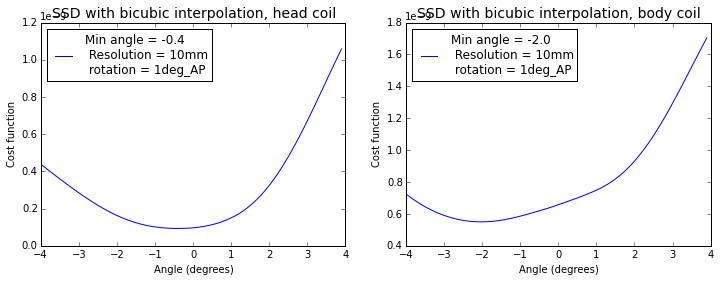

 22 22

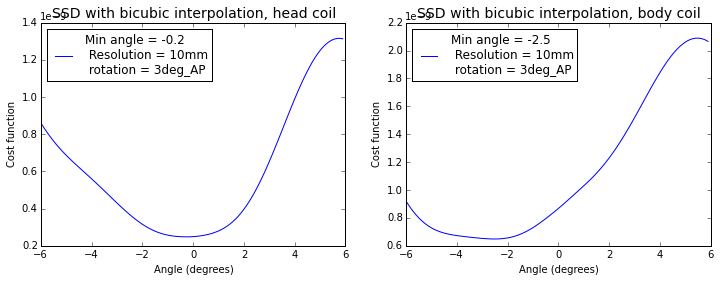

 22 22

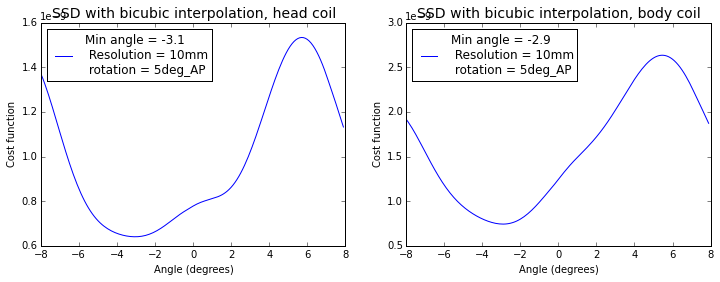

 22 22

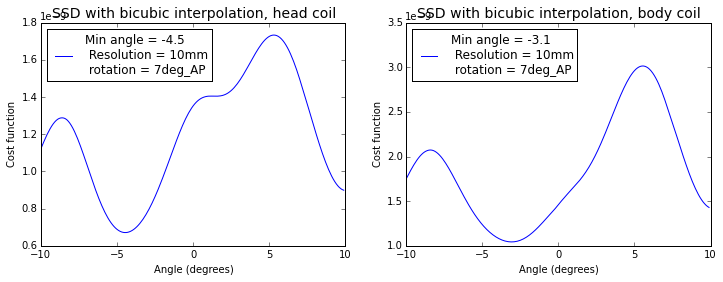

 22 22

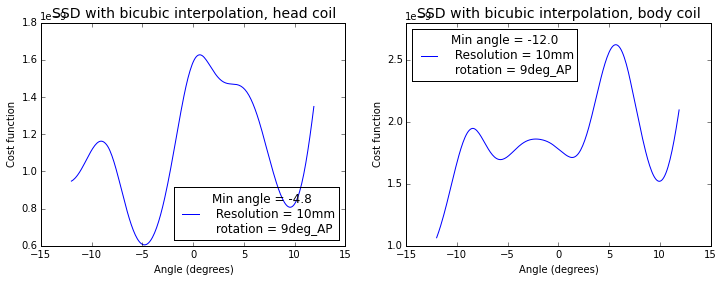

In [10]:
# 20 Halton Samples 
N = 50
rot_axes = ['LR','AP']
degrees = ['1deg','3deg','5deg','7deg','9deg']
resolutions = ['5mm','6_4mm','8mm','10mm']
for res in resolutions:
    for rot in rot_axes:
        if((res == '8mm') & (rot == 'LR')):
           continue
        if(rot == 'LR'): ax = 0
        if(rot == 'AP'): ax = 1
        for deg in degrees:
            plt.figure(figsize=[12,4])
            for idx, coil in enumerate(['head', 'body']):
                d = int(deg[0])
                thetas = np.arange(-d-3,d+3,0.1)
                halton_cost = rot_halton_cost_func(data_dict[res][coil]['iso'][0],
                                           data_dict[res][coil][rot][deg][0], 
                                           N, thetas, axis=0, interpolation='bicubic')
                plt.subplot(1,2,idx+1)
                plot_cost_func(thetas, halton_cost, res, 'bicubic',deg+'_'+rot, coil)
            plt.show()

In [53]:
from rotation_2d import rotate_coords
from utils import to_radian

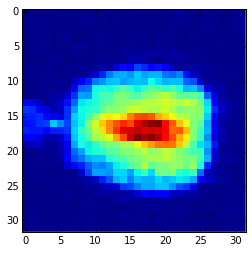

In [108]:
# Spline Interpolation

# extract sample data
res = '8mm'
coil = 'body'
rot = 'AP'
deg = '5deg'
im_ref = data_dict[res][coil]['iso'][0].max(axis=1)
im_rot = data_dict[res][coil][rot][deg][0].max(axis=1)

# fit spline interpolator
x = np.arange(0,32,1)
y = np.arange(0,32,1)
im2 = scipy.interpolate.RectBivariateSpline(x, y, im_rot, kx=3, ky=3, s=0)

# get destination coordinates
x = np.linspace(0, im_ref.shape[1]-1, im_ref.shape[1]).astype(int)
y = np.linspace(0, im_ref.shape[0]-1, im_ref.shape[0]).astype(int)
ox = im_ref.shape[1]/2.-0.5
oy = im_ref.shape[0]/2.-0.5
xx, yy = np.meshgrid(x,y)
theta = to_radian(-10)
dest_x, dest_y = rotate_coords(xx, yy, theta, ox, oy)

# show results
im_rot_2 = im2.ev(dest_y,dest_x)
plt.imshow(im_rot_2,interpolation='None')
plt.show()

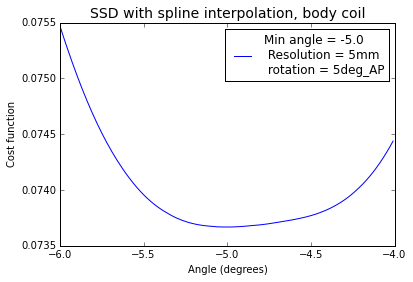

In [92]:
res = '5mm'
coil = 'body'
rot = 'AP'
deg = '5deg'
d = int(deg[0])
thetas = np.arange(-d-1,-d+1,0.01)
cost = rot_cost_func(data_dict[res][coil]['iso'][0],data_dict[res][coil][rot][deg][0], 
                     thetas, axis=1, interpolation='spline')
plot_cost_func(thetas, cost, res, 'spline',deg+'_'+rot, coil)

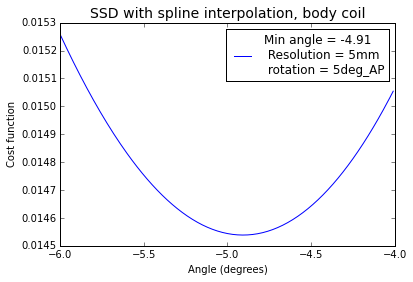

In [93]:
res = '5mm'
coil = 'body'
rot = 'AP'
deg = '5deg'
d = int(deg[0])
thetas = np.arange(-d-1,-d+1,0.01)
cost = rot_cost_func(data_dict[res][coil]['iso'][0],data_dict[res][coil][rot][deg][0], 
                     thetas, axis=1, interpolation='spline',mask=True,smooth=True)
plot_cost_func(thetas, cost, res, 'spline',deg+'_'+rot, coil)

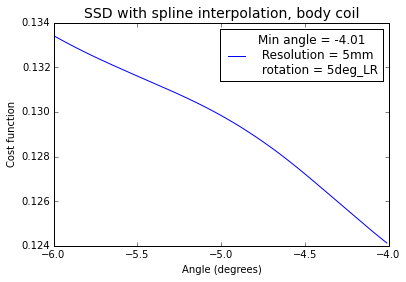

In [109]:
res = '5mm'
coil = 'body'
rot = 'LR'
deg = '5deg'
d = int(deg[0])
thetas = np.arange(-d-1,-d+1,0.01)
cost = rot_cost_func(data_dict[res][coil]['iso'][0],data_dict[res][coil][rot][deg][0], 
                     thetas, axis=1, interpolation='spline')
plot_cost_func(thetas, cost, res, 'spline',deg+'_'+rot, coil)

In [7]:
cost_dict = pickle.load(open('cost_dict_cubic_mask.p','rb'))

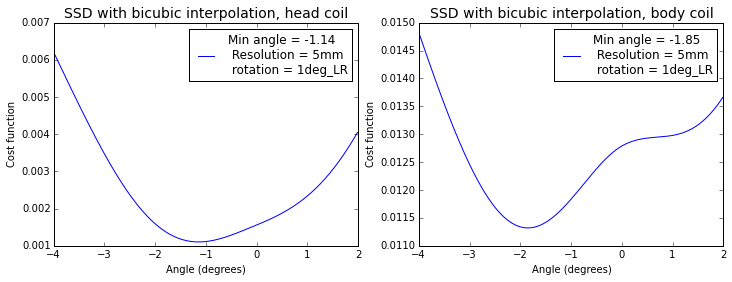

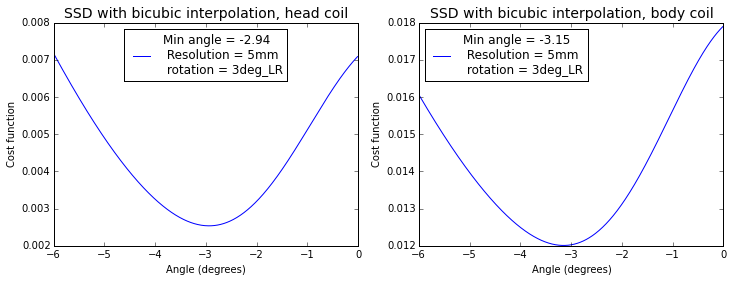

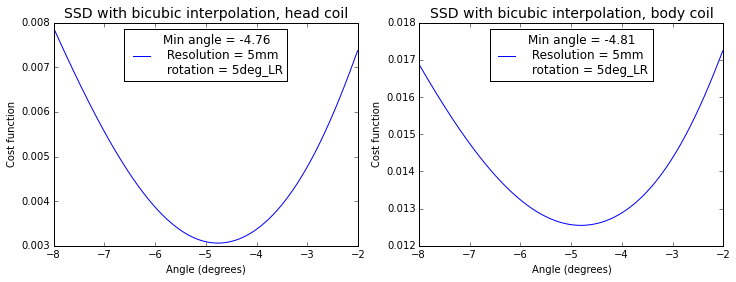

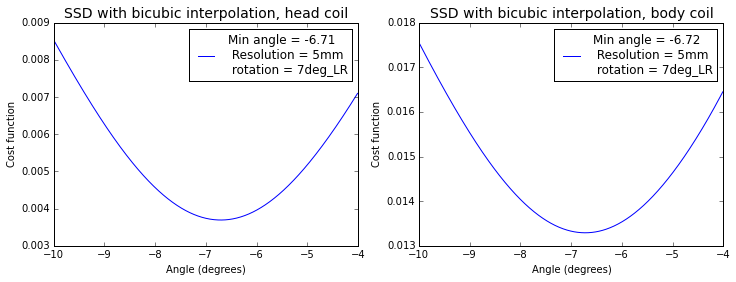

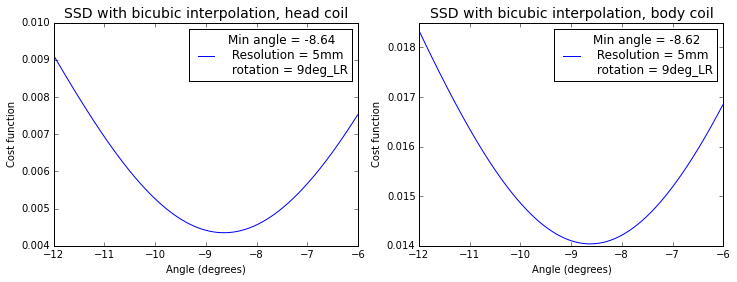

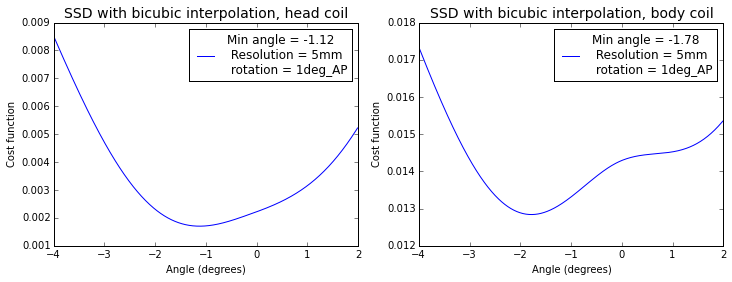

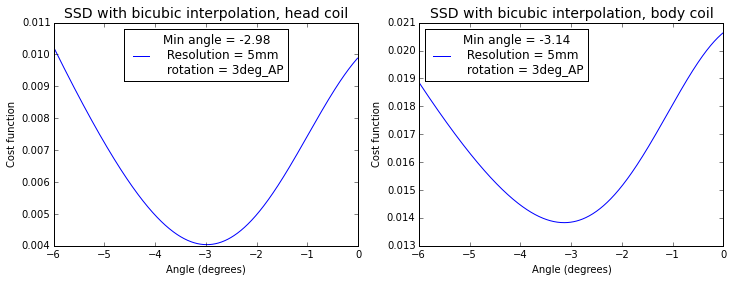

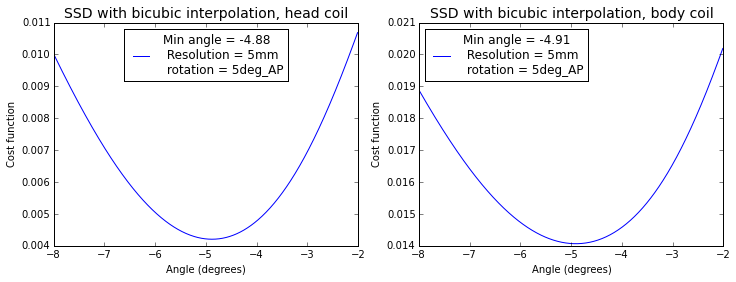

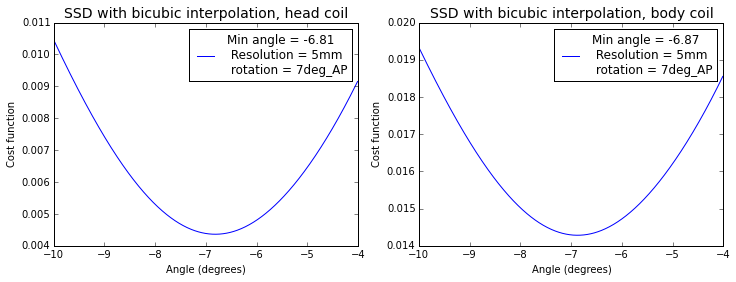

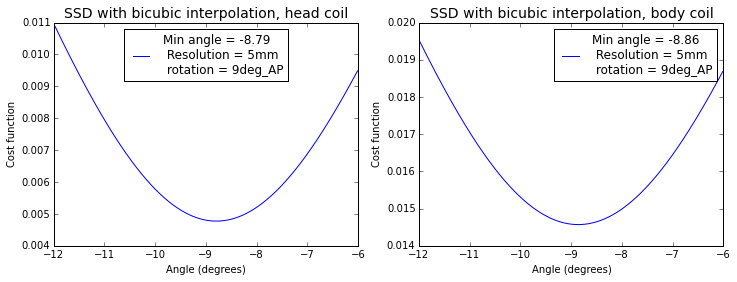

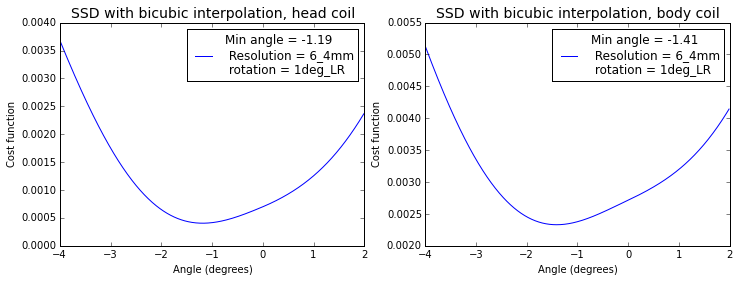

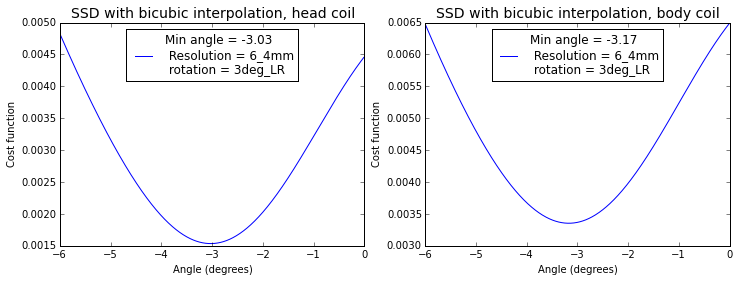

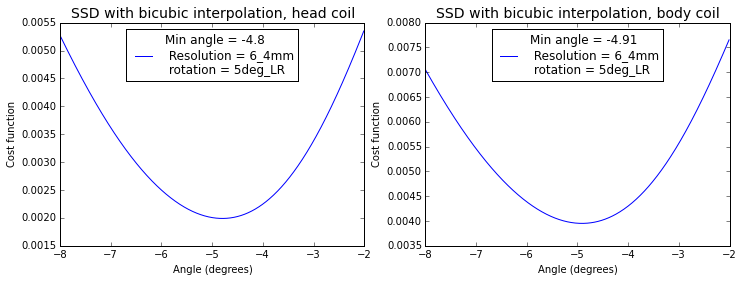

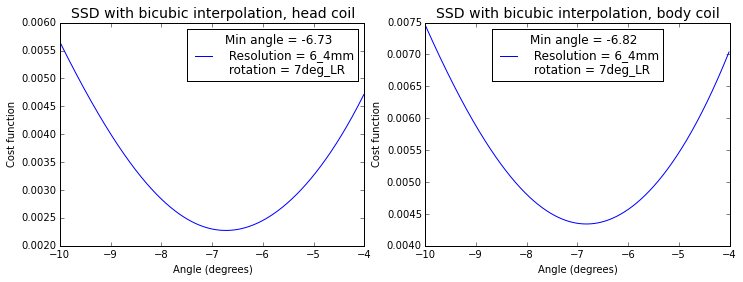

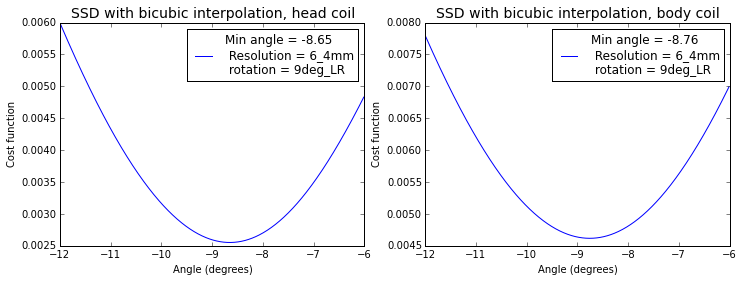

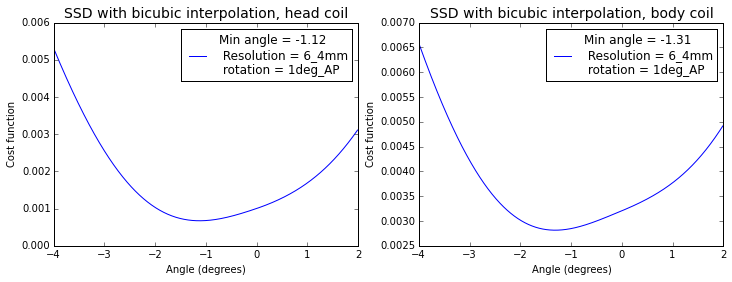

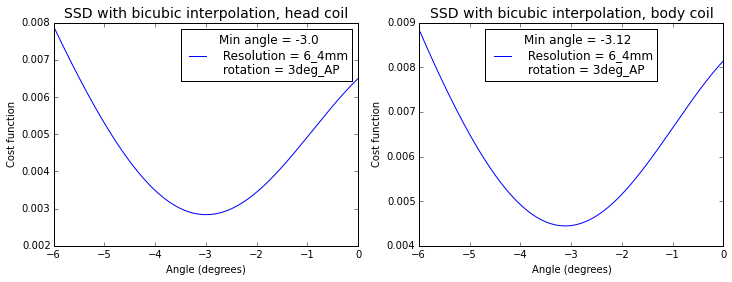

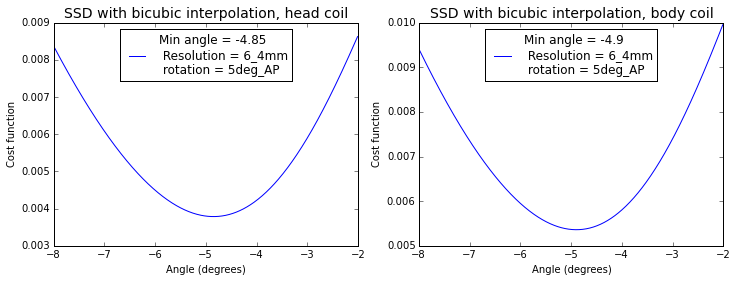

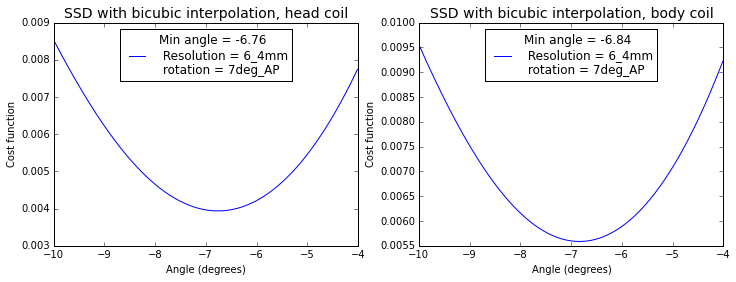

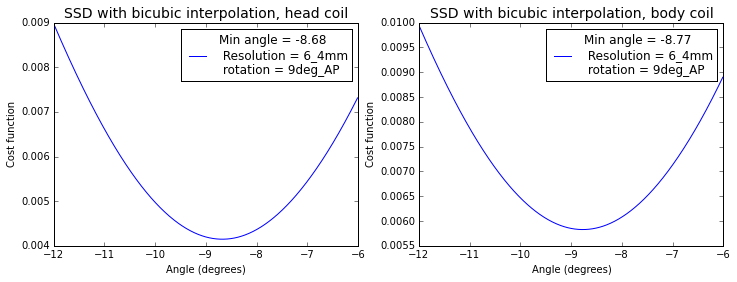

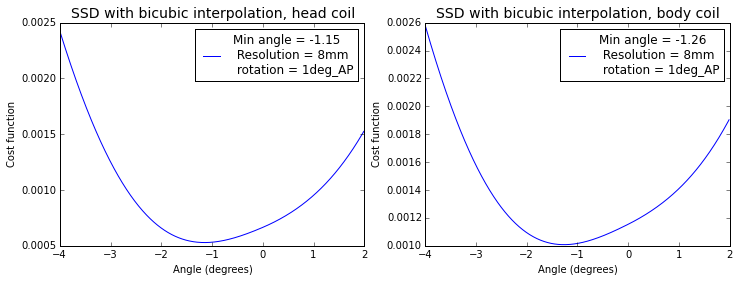

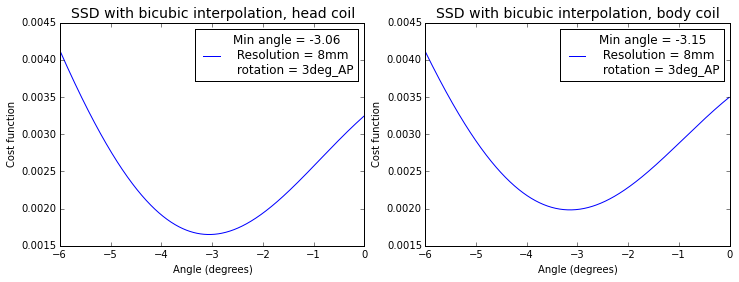

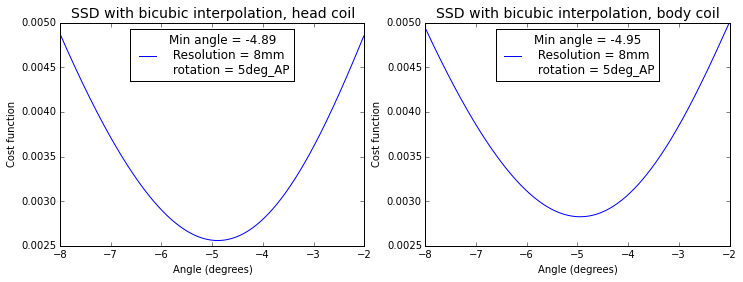

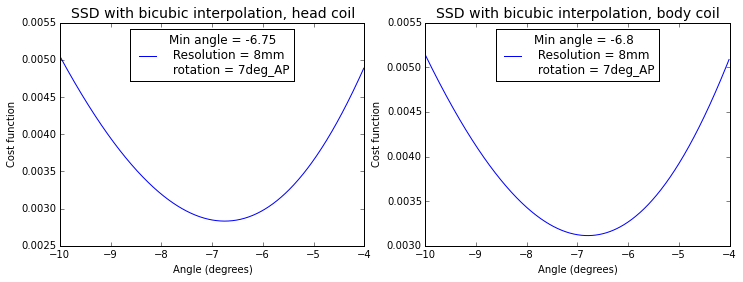

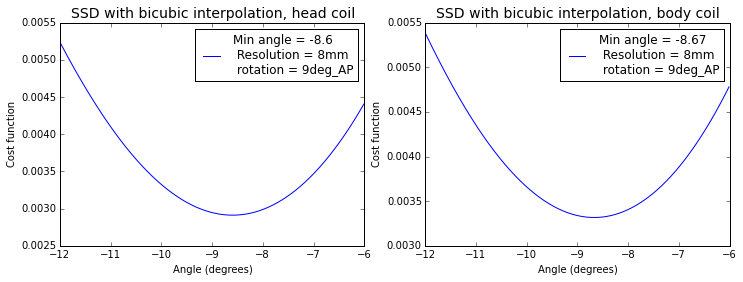

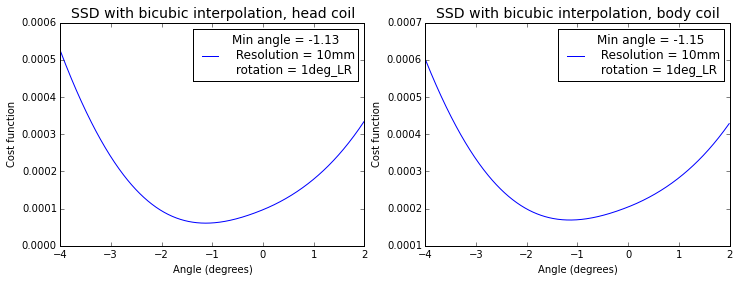

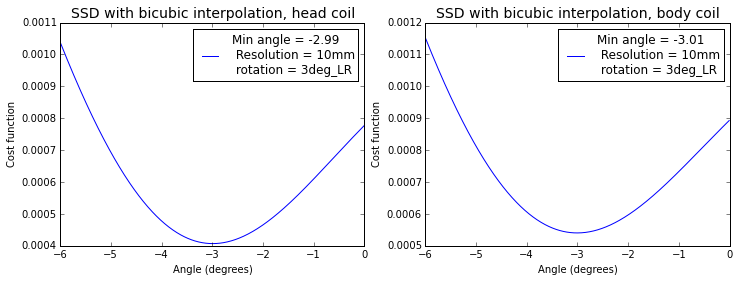

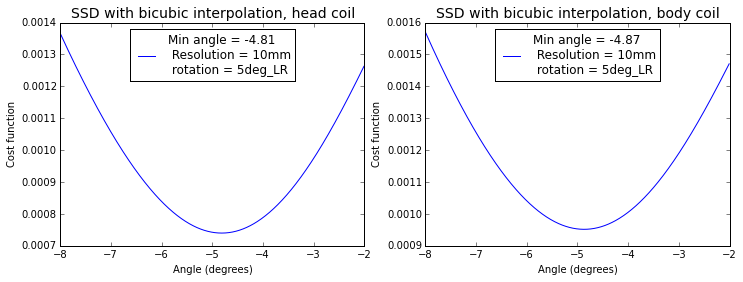

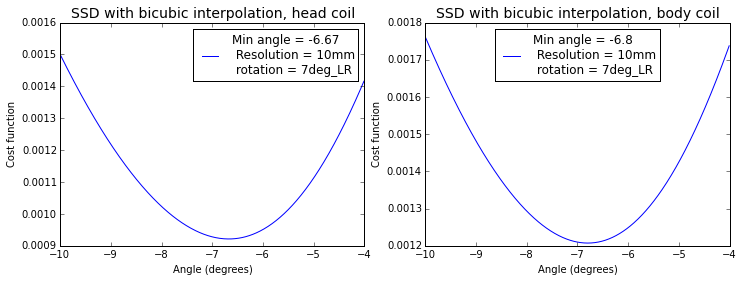

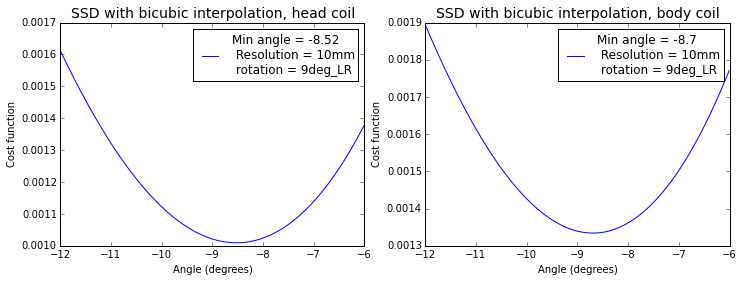

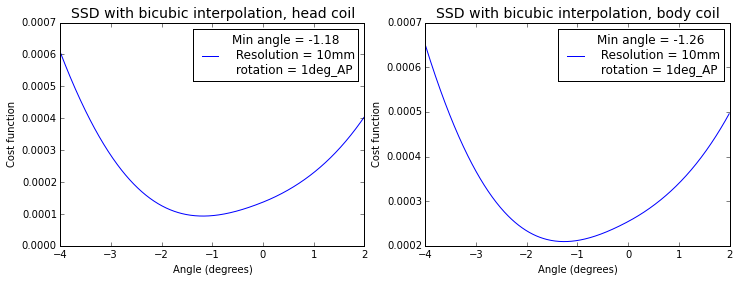

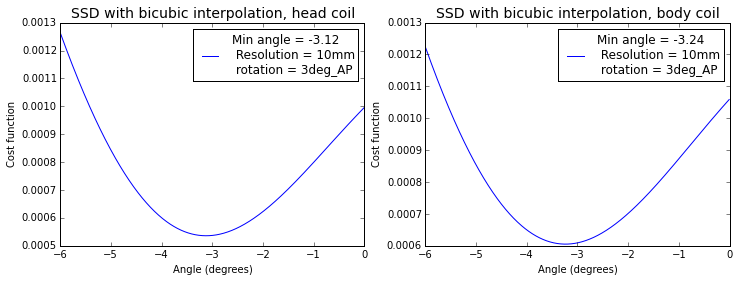

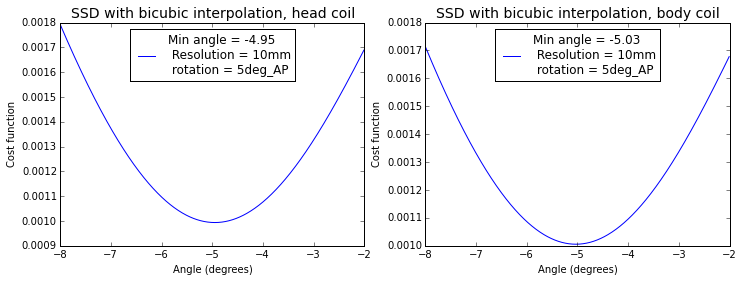

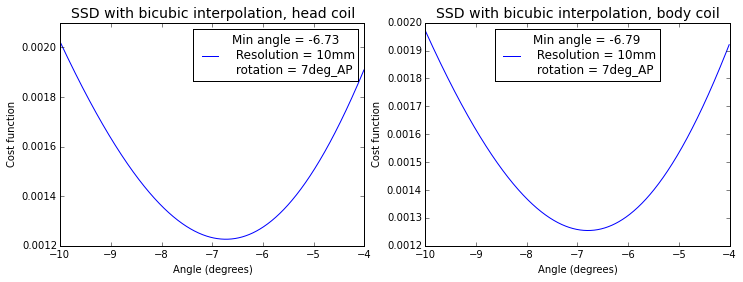

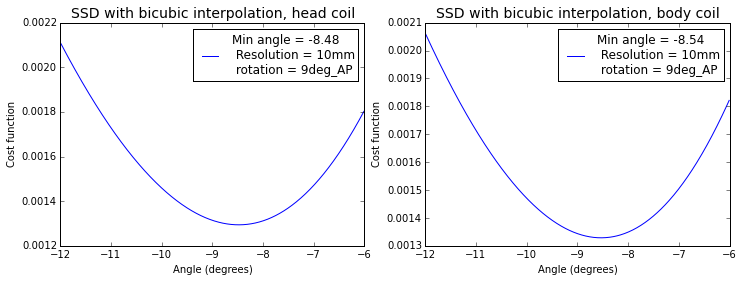

In [13]:
# repetition 0 with mask, 0.01 increment
rot_axes = ['LR','AP']
degrees = ['1deg','3deg','5deg','7deg','9deg']
resolutions = ['5mm','6_4mm','8mm','10mm']
for res in resolutions:
    for rot in rot_axes:
        if((res == '8mm') & (rot == 'LR')):
           continue
        if(rot == 'LR'): ax = 0
        if(rot == 'AP'): ax = 1
        for deg in degrees:
            plt.figure(figsize=[12,4])
            for idx, coil in enumerate(['head', 'body']):
                d = int(deg[0])
                thetas = np.arange(-d-3,-d+3,0.01)
                plt.subplot(1,2,idx+1)
                plot_cost_func(thetas, cost_dict[res][rot][deg][coil], res, 'bicubic',deg+'_'+rot, coil)
            plt.show()

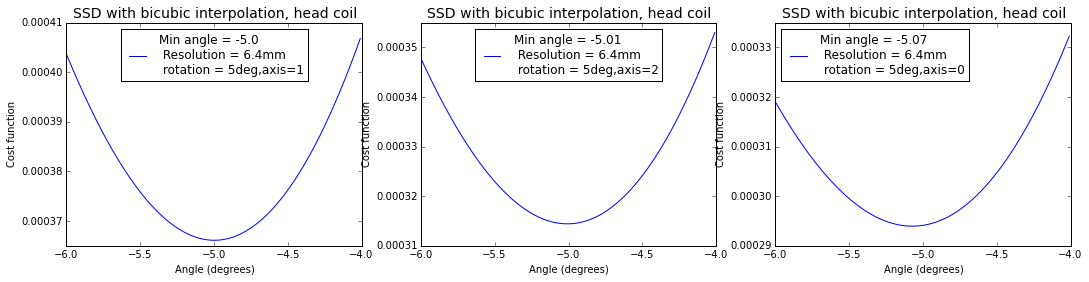

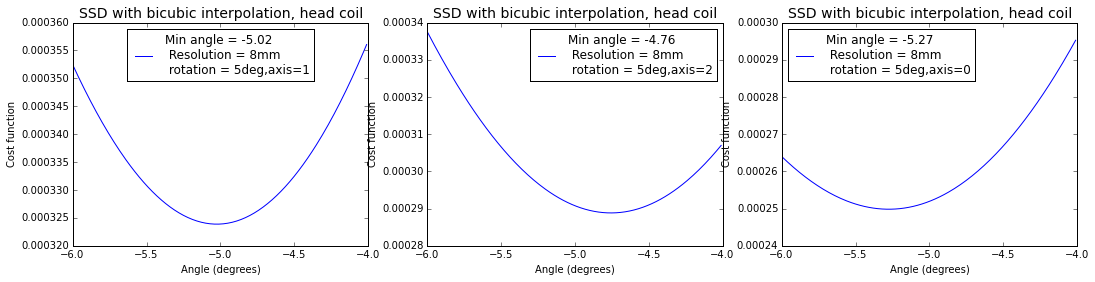

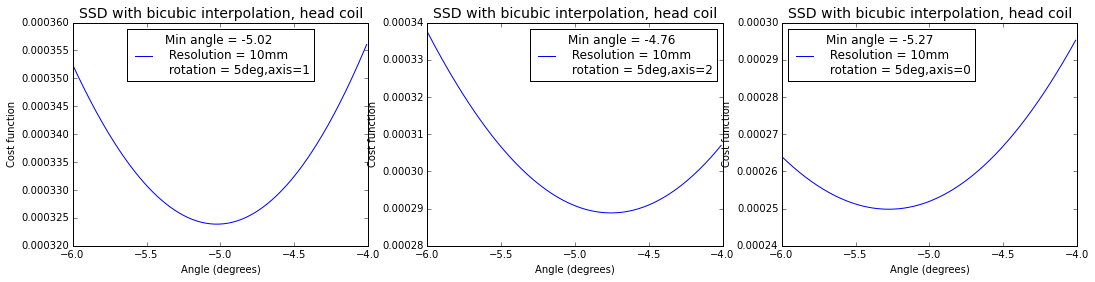

In [29]:
thetas = np.arange(-6,-4,0.01)
plt.figure(figsize = [18,4])
cost_dict_3res = {}
cost_dict_3res['6.4mm'] = {}
for ix in xrange(1,4):
    cost = rot_cost_func(list_6_4mm[0],list_6_4mm[ix],
                         thetas,axis=ix%3,interpolation='bicubic',mask=True,smooth=True)
    cost_dict_3res['6.4mm'][ix] = cost
    plt.subplot(1,3,ix)
    plot_cost_func(thetas, cost, '6.4mm', 'bicubic','5deg,axis='+str(ix%3), 'head')
plt.show()

plt.figure(figsize = [18,4])
cost_dict_3res['8mm'] = {}
for ix in xrange(1,4):
    cost = rot_cost_func(list_8mm[0],list_8mm[ix],
                         thetas,axis=ix%3,interpolation='bicubic',mask=True,smooth=True)
    cost_dict_3res['8mm'][ix] = cost
    plt.subplot(1,3,ix)
    plot_cost_func(thetas, cost, '8mm', 'bicubic','5deg,axis='+str(ix%3), 'head')
plt.show()

plt.figure(figsize = [18,4])
cost_dict_3res['10mm'] = {}
for ix in xrange(1,4):
    cost = rot_cost_func(list_8mm[0],list_8mm[ix],
                         thetas,axis=ix%3,interpolation='bicubic',mask=True,smooth=True)
    cost_dict_3res['10mm'][ix] = cost
    plt.subplot(1,3,ix)
    plot_cost_func(thetas, cost, '10mm', 'bicubic','5deg,axis='+str(ix%3), 'head')
plt.show()
pickle.dump(cost_dict_3res,open('cost_dict_3res.p','wb'))

In [30]:
dict_3res = pickle.load(open('dict_3res.p','rb'))

In [ ]:
cost_dict_3res = pickle.load(open('cost_dict_3res_cubic.p','rb'))
resolutions = ['6_4mm','8mm','10mm']
rotations = ['5_deg_RL','5_deg_AP','5_deg_HF']
thetas = np.arange(-6,-4,0.01)
cost_dict_3res = {}
for res in resolutions:
    cost_dict_3res[res] = {}
    plt.figure(figsize = [30,10])
    for ax, rot in enumerate(rotations):
        cost_dict_3res[res][rot] = []
        plt.subplot(1,3,ax+1)
        for i in xrange(5):
            plot_cost_func(thetas, cost_dict_3res[res][rot][i], res, 'bicubic',rot+str(i+1), 'head')
    plt.show()